# Sep 24th, 2021

**Motivation**: Figures <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Figure 1

### What
#### Intro, experimental setup, overal approach, set the stage
This figure shows:
- This study is about functional connectivity.
- Using simultaneous BOLD + $Ca^{2+}$ data from mice.
- A very big picture illustration of the algorithm used.
    - The main result of the algorithm is $\pi_i$.  Show what it means for an example ROI (that has mixed membership)
- At the end of this figure we are ready to see the main results.

### How
Some more details:
- On top left there is a mouse cartoon, and somehow showing that we get BOLD as well as Ca data from same animals simultanesouly.
- Then --> the timeseries are used to compute covariance --> then it's thresholded.
- This binarized graph goes into the algorithm which tries to explain its links (or non links) with an explicit generative model.
- The most important things about the algorithm are visualized:
    - First, some how we show every ROI can belong to more than one communities: this is key
    - Therefore, the membership vector is like a die
    - Generative process:
        - (a) roll dice for i (i.e. sample from $\pi_i$)
        - (b) roll dice for j (i.e. sample from $\pi_j$)
        - (c) toss a coin to see if they have link $y_{ij} = 1$ or no link $y_{ij} =0$ (i.e. sample from Bernoulli)
- Somehwere in this figure there is a 3D rendering of the spherical ROIs.

## Figure 2

### What
#### Main result: mouse FC is signicantly overlapping
This figure shows:
- The resulting overlapping communities (how they look like) and also the distribution of membership values
- Also, to emphasize this is a link communituy, there is a mouse brain on which there are some nodes and the links are colored according to the disjoint approximation.  One for each data modality.

### How
Some more details:
- We have discussed this before. Basically, the binned histograms and an emphasis on the last bin (some *** there showing the last bin density is significantly lower than 80% for all communities)

## Figure 3

### What
#### Comparison to baseline graphs (addressing: what if this is idiostncracy of the algorithm used?)
This figure first defines the baseline models used:
- LFR graphs with controllable amount of overlap
- Config and Clustered Config models

Then, these baselines are used to make the following claims:
- The algorithm used is pretty good in what we ask it to do: it detects the correct amount of overlap in LFR graphs
- How does the nontrivial topology of the real graph contribute to the overlap?  Is it the degree distribution, or is it the clustering coefficient that's driving this?
    - We see that the Config model shows more overlap than the real model, and config clust shows less overlap
    - The real graph has a nontrivial topology (i.e. wiring) that leads to the way things are organized 

### How
- First, there are two represntative adjacency matrices for LFR graphs, one totally disjoint, and the other overlapping. This immediately gives the impression why we use them to test our claims.
- Then, there is a bar plot that shows config and config clustered are good baselines: they have the same degree distribution like the real graph, and the clustered version has the same clustering coefficient
- Therefore, any difference we see between these graphs and the real one must be due to the nontrivial topology of the real graph
- In figure 2 the focus was on communities (we plotted the membership distributions for communities), here the focus is on nodes
- We calculate the maximum membership value $x_i = argmax_{k}\pi_{ik}$. This is an interesting number, since it will tell us about to what extent is a node overlapping or disjoint.
- The membership valus are numbers between 0 and 1, and they add up to one.  Therefore, looking at $x_i$ is informative.
- We plot the distribution of $x_i$ over all nodes.  For the real graph, and all the other ones mentioned here
- I think it's better to do this on the logit transformed version. Define $$u_i = \text{logit}(x_i) = \log(\frac{x_i}{1 - x_i}).$$ We see that $x_i \in (0, 1)$ and $u_i \in (-\infty, \infty)$.  Therefore, we can use bootstrapping and t-test on $u_i$ which makes more sense compared to $x_i$.
- We do another significance test here: this time on nodes: If a node is disjoint
- This way, we find the proportion of nodes that are disjoint in a graph
- We claim that at least half of the nodes participate in more than one communities.  Therefore, it is necessary to think in overlapping terms and disjoint approaches don't do justice.
- Once again, we show that our results make sense on LFR graphs, therefore, our claim will be strong (significance + showing things make sense on synthetic graphs).

## Figure 4

### What
#### Systematic comparison of results for BOLD and Ca (at the adjacency matrix and graph level)
- Ok, so far in 3 figs we have established that
    - What this study is about
    - The main result so far: characterizing overlapping communities. also justification for using overlapping approach
    - And solid evidence that mouse FC graph is overlapping in a nontrivial way
- Now, it is time to look at the two data modaliteis carefully and study the shared and non-shared features
- I think this is an excellent opportunity to study the differences and similarities between the two modalities at the network level and benchmark things (this will be useful for the next project which starts at the direct time series level to study dynamic FC)
- Here we want to address a simple question: what aspects of our results is present/valid for both Ca and BOLD, and what parts differ
- First off, let's look at the covariance matrices.  Each element $w_{ij}$ is correlation between time series cominig from $i$ and $j$.  Here, if we restrict our analysis to the ROIs that are present in 2d Ca space, then we can directly compare things.
- Why compare adjacency matrices?  Linear correlations are informative about the interactions going on in the system.  We don't have a proper theory to understand these correlations properly, but at least we can see if we get the same structure using both data modalities.
- Rank correlation betweeen the two covariance matrices can be used to study similarity, and specially, which edges are most similar across datasets, and which edges are most dissimilar.  Is this due to something interesting, or just noiise, or other errors in data processing?
- It is important to make comparisons at different frequency bands.  The adjacency matrix is well defined for the raw signals as wells as bandpassed ones.  How does this number (similarity of adj matrices) vary as a function of bandpassing?
- Next, it is interesting to look at graph topology at different thresholds
- Compare graph topologies at different thresholds, for Ca, BOLD, between-subject, within-same-subject and so on.  There are many interesting combinations, this will become clearer later
- At each level of this figure, the within-subject, and within-session similarities are used as baseline comparison

### How
- I don't have a clear plan, but here are some rough ideas
- For topological distance, I like to use Network Portrain Divergence. It's based on nice principles and shows reliable results (I was happy last time i tried it)
- The adjacency matrices can be directly compared in Fourier domain.  Each frequency has a non-negative contribution to each element of the adjacency matrix $w_{ij}$. By studying this problem in the Fourier domain, we can learn whether we gain nontrivial information about the underlying dynamics by using Ca data (i am sure we do, but have to quantify it and provide evidence)

## Figure 5

### What
#### Compare our results to other disjoint results, including the recently published ones (this figure includes comparison of BOLD and Ca at the community structure level -- maybe this should be fig 4, and 4 should be 5?)
- The goal is to show we recover existing results by other labs that have used non-overlapping approaches
- The argmax, disjoint limit of our results reduces to existing results
- Also, compare to hierarchical clustering results
- Just like every other figure, we have both BOLD and Ca, and also comparison between the two modaliteis

### How
- At the disjoint approxmination level Dice coeff will be used to quantify similarity scores
- Specifically, I want to download the DMN found by ICA fomr the recent DMN paper and compare it to what we find
- The interesting thing is we compare between:
    - The disjoint limit of our overlapping results (argmax): a stochastic algorithm
    - ICA results recently published: essentially a simple generative model
    - Hierarchical clustering (Ward's Linkage): dumb, brute-force, agglomerative approach
- If they all give the same answer, we know that this is a real thing, and another validation for our overlapping philosophy (i.e. it gives you what other algorithms give, plus way more than that: dense memberships)
- The comparison between Ca and BOLD can be made at several levels:
    - First, Dice coeff for argmax approx
    - Then, dot product between membership values
    - Again, between-subject, and same-subject between-session numbers will be used as baselines to make sense of these quantities

## Figure 6

### What
#### Study of node entropies

- Here we focus on node entropies, a quantity that our overlapping algorithm provides us but disjoint ones don't.
- The goal is to explore what else we can learn about the brain by using an overlapping approach.  This flows nicely from previous figure where we showed we recover disjoint results, and now here is what we have and they don't.
- In the network science literature this quantity is known as bridgeness. A reg plot showing bridgeness vs.entropy is useful at some corner: to show that they literally are the same thing (I did before, I got spearman $\rho$ = 0.97).
- The entropy values visualized on the cortex, for both Ca and BOLD.
- Entropy-Degree cartography shows that we can reveal interesting structures that would be burried if we used simple centrality measures.  The entropy exis adds more info that hubness or eigenvecgor centrality or all the other rather nonesensical measures people talk about.
- Also show something like that core-preiphery paper by the Stanford guy, and say that both types of overlap are present in our data: high-degree_high-entropy, and also low-degree_high-entropy (show a represntative parts of adjacency matrix for both dense and sparse overlaps. yes they both exist in our data)

### How
- 

## Figure 7

### What
#### Relationship between entropy and anatomical connectome. One possible finding: an explanation for why certain nodes have different ent

- The obvious intuition about high entropy nodes is that they act as coordinators in the brain.  They talk a little bit to a lot of other regions.  Therefore, they will have a little bit of correlation with many other regions.
- If this is true, then anatomical hubs will coincide with functional high entropy nodes
- A reg plot of anatomical degree and functiona entropy
- Here it would be useful to have a comparison between results obtained from other overlapping algorithms
    - OSLOM is a good one
    - community-affiliation graph model (AGM) is good
    - edge FC
- Edge FC predicts high entropy for visual cortex and low entropy for association areas, while SVINET and the other algorithms predict the opposit.  Which is closer to truth?
- A reg plot beteen anatomical degree and entropy as estimated by all these algorithms
- Which reg plot has a nonzero slope?
- I think the motivation behind eFC algorithm is nice and respectable, but something must be horribly wrong otherwise it wouldn't make such nonesense predictions. I think it would be nice to examine this in fig 7.  That paper got into nature neurosceince, so people need to know if it's actually nonesense

### How
- 

## Figure 8

### What
#### Relationship between our findings, a node similarity measre (defined below), and FC gradients

- First, let me define this node similarity measure.  The algorithm is build on the idea that membership values can be used to infer whether two nodes will be linked or not
- If $\pi_i$ and $\pi_j$ are aligned, there is a high chance of drawing the same community indicator and, therforee, having a link between $i$ and $j$
- You can tell this mathematically by defining $Y_{ij} = \sum_k \pi_{ik} \pi_{jk}$ (in the full model this is a weighted sum $Y_{ij} = \sum_k \beta_k \pi_{ik} \pi_{jk} $, where $\beta_k$ is community strenght for different $k$)
- This quantity can be thought of a node similarity measure as follows:
    - $Y_{ij}$ is the probability that node $i$ will be connected to $j$
    - Take $i-th$ row of this matrix: $Y_i$. This vector essentially has dense information about likelihood of node $i$ connecting to every other node in the graph
    - ***Main insight***: if two nodes $a$ and $b$ are **similar**, then they will have a similar $Y_a$ and $Y_b$.  This essentially says the way you connect to everybody else defines who you are.  If the way $a$ connects to everybody esle is is very similar to the way $b$ connects to everybody else, then they are similar and they will most likely be in the same community
    - Therefore: "$a$ and $b$ similar" is equivalent to "Cos($Y_a$, $Y_b$) is large"
    - We can think of $Y_{ij}$ as a questionare, if two people answer more or less similarly to a large set of questions, then chances are they are very similar people and do very similar things
    - If we tale this matrix $Y$ and make a t-SNE visualization, we find very interesting organization
    - Please see [this figure for example](#brief-t-sne-before-moving-on)
    - In the figure we see an arch which has visual community in one end (orange), and somatosensory on the other end (green).  They both converg in the middle on DMN (blue, red and purple), and then on the other side there is subcortical regions (yellow)
    - This is quite robust to the choice of random seed and perplexity (a tunable parameter in t-SNE), thus, I believe it is capturing something real and important
    - From this approach I think I accidentally stumbled upon something known as sensory-to-transmodal dimension that people in gradient papers talk about
    - This is rich with insights, but I haven't had time to explore properly

#### Relationship of network overlaps and entropy maps we discovered and FC gradients:

- Gradient approach is getting a lot of momentum recently. I like it and want to contribute to this momentum.   From [this paper](https://www.sciencedirect.com/science/article/pii/S1053811920310132):

> Large-scale cortical gradients were recently put forward as an analytic tool to capture the intrinsic dimensions of cortical organization (Haak et al., 2017; Huntenburg et al., 2018; Margulies et al., 2016). In contrast to parcellation approaches, which emphasize the **discreteness** of cortical regions or networks (Glasser et al., 2016; Yeo et al., 2011), cortical gradients focus on the significance of **overarching spatial patterns** in cortical features.

- This way of thinking is interesting, and aligned with our big picture goals.  Therefore I definitely want to have a figure related to gradints, possibly in the same figure talking about $Y_{ij}$ and t-SNE stuff.

- Since I don't know the literature very well I will refrain from discussing specifics here

- The intuitions (e.g. discussion about sensory-to-transmodal) make sense to me
- This seems related to the t-SNE embedding of node similarities that I made before as I described above

### How
- This is not crystal clear in my mind yet, but I'm sure there is an interesting correspondense and we should talk about it

## Figure 9

### What
#### Node similarities and physiological distance (metabolic cost / information flow tradeoff)

- We defined $Y_{ij}$ in the previous fig, looked at its t-SNE embedding and compared it to FC gradients
- Another way of thnking about large scale brain organization is to look at physiological distance between regions in conjunction to functional distance (here by physiological i mean euclidean distance in real space between regions)
- Having long-range connections is costly, but in return you get fast information integration
- This is a genetic hyper-prior and is another way of trying to understand why some nodes have high entropy
- Again, I anticipate high entropy nodes to connecto to connect to physiologically distant regions
- What is the relationship between functional similarity as defined by $Y_{ij}$ and physiological distance?
- Of special interest, is regions that are anatomically far away, but have high likelihood of having link.  Do these coincide with high entropy regions? [ref 1.](https://www.pnas.org/content/109/15/5868)
- One question that might arise here is why not just look at $w_{ij}$ and why go the extra mile and define $Y_{ij}$? There is a deep insight about generative models, in that they try to infer something about inherent structure that might be more general than one instance (drawing) of the whole thing.  This is very vague, but basically what I'm saying is that the model learns something more than meets the eye by trying to predict links given a sub graph.  The model infers a general structure that is not fully present in just the adjacency matrix $w_{ij}$.  I have looked at the relationship between $Y_{ij}$ and $w_{ij}$ and they are correlated but different. This is a very poor description, I will try to find how to make this clearer but the motivation remains

### How
- 

## Summary

The general story of this paper is about large scale organization of the brain.  Specifically, within an overlapping community detection framework.  Another persistent theme throughout all of these figures is presense and comparison of both BOLD and Ca data.  So, in summary:

- The first third of the figures is about providing evidence why we use overlapping, and why it's a better philosophy to being with
- Some people probably find this unnecessary, so we provide evidence that this way of thinking is interesting.  Science is about characterizing uncertainty.  Reality is seldom binary.
- Then, the next third is about benchmarking and comparisons.  This should be simple but informative.  For example comparing BOLD and Ca graphs at different frequency bands, or comparing resulting communities is just useful information
- The last third is about using what the overlapping approach gives us, and profiting off of it. We can use it to characterize node entropies. Use node entropies along with degree centrality to characterize different communities.  Study its relationship with other modalities (e.g. anatomical data) and so on
- If I saw this paper published, I would find the first 1/3 to be trivial and boring.  Why do these people want to show it's overlapping?  Do we have to show earth is going aroun the sun?  I thought Galileo already did that.  Etcc.
- The second third will be just useful information that I can use to build an intuition aboumt this multimodal data
- The last third would be the most interesting parts for me, since it's speculative and it is a step towards understanding relationship between FC and SC, and also gradients in the brain
- So there is something for everyone I guess.

## Sup fig candidates

- Robustness of resutls to the choise of k (num communities) + showing how results depend on the chosie of k
- different ROI definitions give same result.  This is just changing the n_roi parameter and showing the communities, and entropy map.  They look similar, but with different resolutions
- Robustness of results to ROI definition.  Eroded? Spheres? etc. This has a figure showing the distribution of ROI sizes, and shows that it is uniform.  Therefore, it leads to more robust results in cortex). Using allen ROI definitions lead to bad results (we need spatially homogeneous).  Discuss something about subcortical regions, and why it requires careful decision making.  This leads nicely to the next figure about e.g. dorsal striatum.
- Correlation patterns of **dorsal striatum** with everything else --> thus the need to break it into many smaller regions. The question of **correct** labeling of regions is far from solved (and might not resolve ever).  So we can add some discussions about this and raise awareness about the issues. 
- Also discussions about data spaces, how we register allen CCF to our 3d and 2d individual spaces.  We can show some of that info in supp figs (Eve and Francesca are writing a paper about this, so they can provide some figs)
- Result of applying Louvain, Lieden, and other modularity maximization algorithms.  Show that (i) plateaus indicate existence of robust communities, however cite the Clauset 2009 paper and talk about this degeneracy is a huge problem, thus overlapping approach is helpful in that sense as well.  This has overlapping and non overlapping modularity performance reports too

## An update about registration

I was using allen template image (left) but this wasn't ideal.  It's made using a technique called "serial Two-photon (STP) tomography" but there is another version using NISSL staining (mididle).  Xilin said they used this one, so I tried it and improved the quality of registration.

I'm not sure, but suspect that the left-right asymmetry that I found in the visual cortex and in the left hemisphere in general could be due to bad registration.  Right now I'm working to finish this up and move on with all the other items.

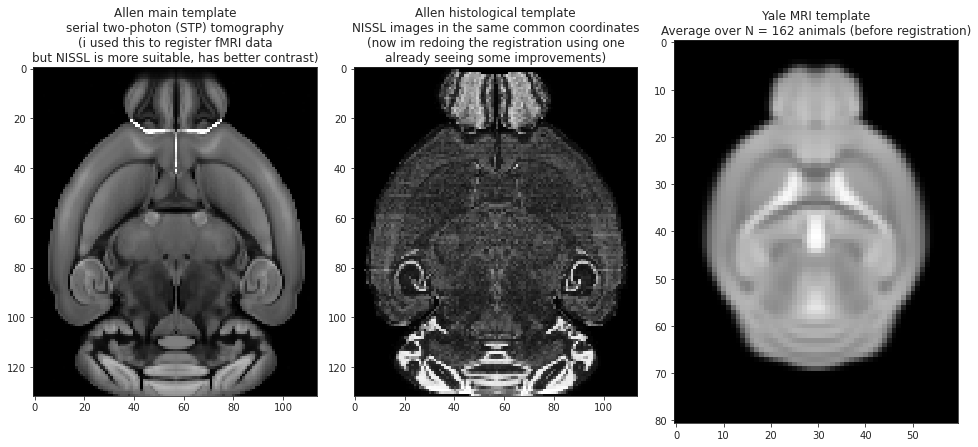

In [7]:
mice = Mice(Config(32))

from register.register import *
reg = Register(mice)

fig, axes = create_figure(1, 3, (13.5, 7))
axes[0].imshow(reg.template[:, 40, :], cmap='Greys_r')
axes[1].imshow(reg.nissl[:, 40, :], cmap='Greys_r')
axes[2].imshow(reg.in_house[:, 13, :], cmap='Greys_r')

axes[0].set_title('Allen main template\nserial two-photon (STP) tomography\n(i used this to register fMRI data\nbut NISSL is more suitable, has better contrast)')
axes[1].set_title('Allen histological template\nNISSL images in the same common coordinates\n(now im redoing the registration using one\nalready seeing some improvements)')
axes[2].set_title('Yale MRI template\nAverage over N = 162 animals (before registration)')

plt.show()

---
## Ignore below (draft)
---

## Fig candidates

1. Intro, experimental setup, overal approach, set the stage
2. Overlap results (histogram) Bold + Ca
3. Compare to LFR, other baselines such as config and config clust
4. systematic study of Ca and BOLD comparison.  Dice coeffs and stuff on disjoint.  Dot product comparison of gamma, and topological graph distance comparison using Portrait Div or something similar (across thresholds)
5. compare to disjoint (download DMN from Whitecell et al) + compare to Ward's Linkage (important message: see, we get the same answer using different approaches.  ICA is essentially a simple generative model, Ward's linkage is a dumb brute force aggregate method, and SVINET is stochastic, but they all give the same answer)
6. Study entropy, plot side-by-side with eFC results and show contrast. A reg plot showing bridgeness is literally just entropy. Entropy-Degree cartography, also show something like that core-preiphery paper by the Slovenian stanford guy, and say that both types of overlap are present in our data: both high degree, high ent, and also low degree, high entropy
7. Entropy/anatomical comparison. Thus, finding a possible explanation for why different nodes have different ent
9. Anatomical distance, vs functional distance.  Usiing Y_ij, one can try to understand possible relationships between probability of having a link between two ROIs, and their anatomical distance.  Of special interest, is regions that are anatomically far away, but have high likelihood of having link.  Do these coincide with high entropy regions? [ref 1.](https://www.pnas.org/content/109/15/5868)
8. t-SNE embedding of similarity matrices Y_ij.  Nice viz stuff, shows two sensory axis: visual and somatomotor, transmodal in the middle, and subcortical is another dimension.  Nice sensory-to-transmodal direction. Compare to gradients.  [ref 1.](https://www.cell.com/trends/cognitive-sciences/fulltext/S1364-6613(17)30240-1) [ref 2.](https://www.nature.com/articles/s41593-020-00711-6) [ref 3.](https://www.pnas.org/content/116/42/21219) [ref 4.](https://www.sciencedirect.com/science/article/pii/S1053811920310132) [ref 5.]()


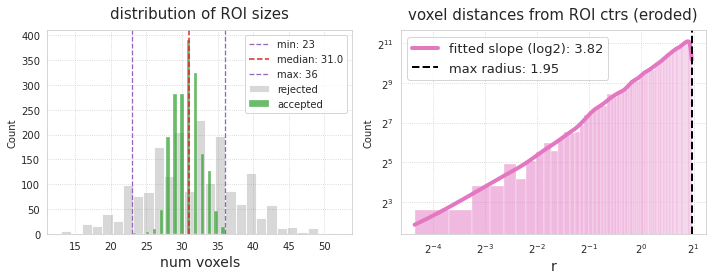

In [77]:
_ = mice.parcel.show()

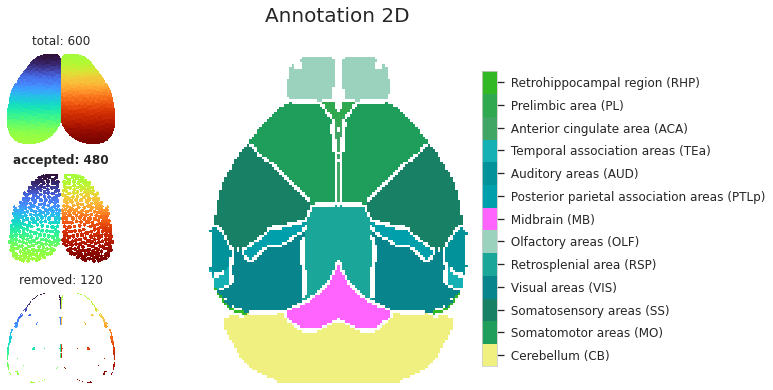

In [78]:
_ = mice.parcel.show2d()

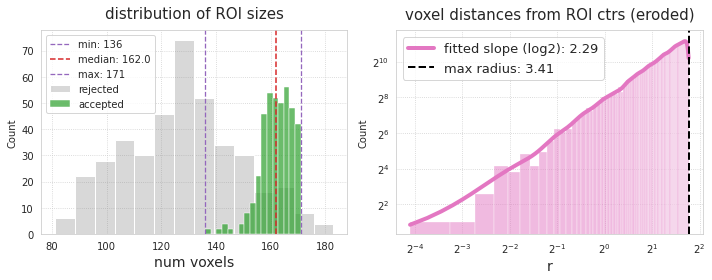

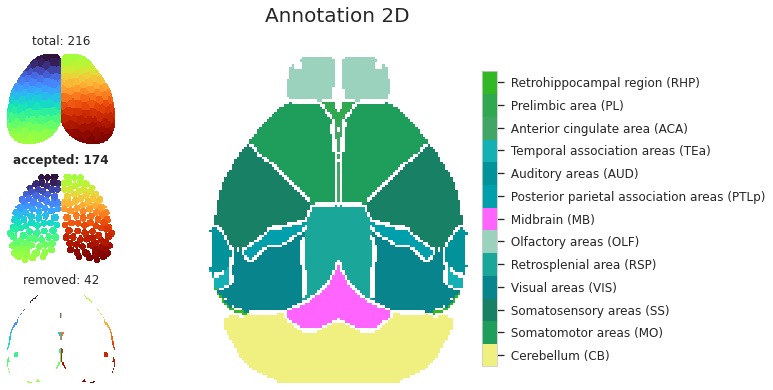

In [53]:
net = Network(mice, 'sub-SLC', percentiles=np.linspace(29, 10, 21)).load_network()

In [54]:
net.thresholds

{
    53: 0.0,
    29: 0.04139814153035346,
    28: 0.0439684986595741,
    27: 0.04665225133476631,
    26: 0.04936660219451171,
    25: 0.052399799401693696,
    24: 0.05545280871768082,
    23: 0.0586778935809938,
    22: 0.06223419581750657,
    21: 0.06604398443860941,
    20: 0.07007351599928377,
    19: 0.07444967885731966,
    18: 0.07908949206469937,
    17: 0.08432095527569944,
    16: 0.08963561001531985,
    15: 0.09574749438834834,
    14: 0.10194368215506612,
    13: 0.10915048865093123,
    12: 0.11692139398431177,
    11: 0.12552904940431253,
    10: 0.13497348491291086
}

In [56]:
a = nx.adj_matrix(net.graphs[20]).todense()

In [57]:
np.min(a[a > 0])

0.08037398611890612

In [58]:
nx.density(net.graphs[20])

0.17830474509149033

In [59]:
net.make_graphs(False)

[PROGRESS] graphs: done

In [60]:
nx.density(net.graphs[20])

0.20080158408283036

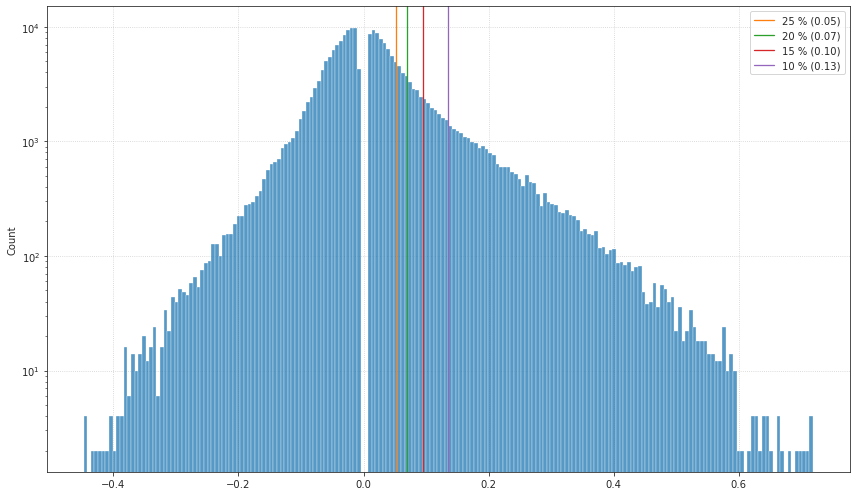

In [73]:
fig, ax = create_figure(1, 1, (12, 7))

x = net.adj.copy()
sns.histplot(x[x != 0], bins=200, ax=ax)
plt.yscale('log')

for i, d in enumerate([25, 20, 15, 10], start=1):
    th = net.thresholds[d]
    ax.axvline(th, lw=1.3, color=f"C{i}", label=f"{d} % ({th:.2f})")
ax.legend()
ax.grid()

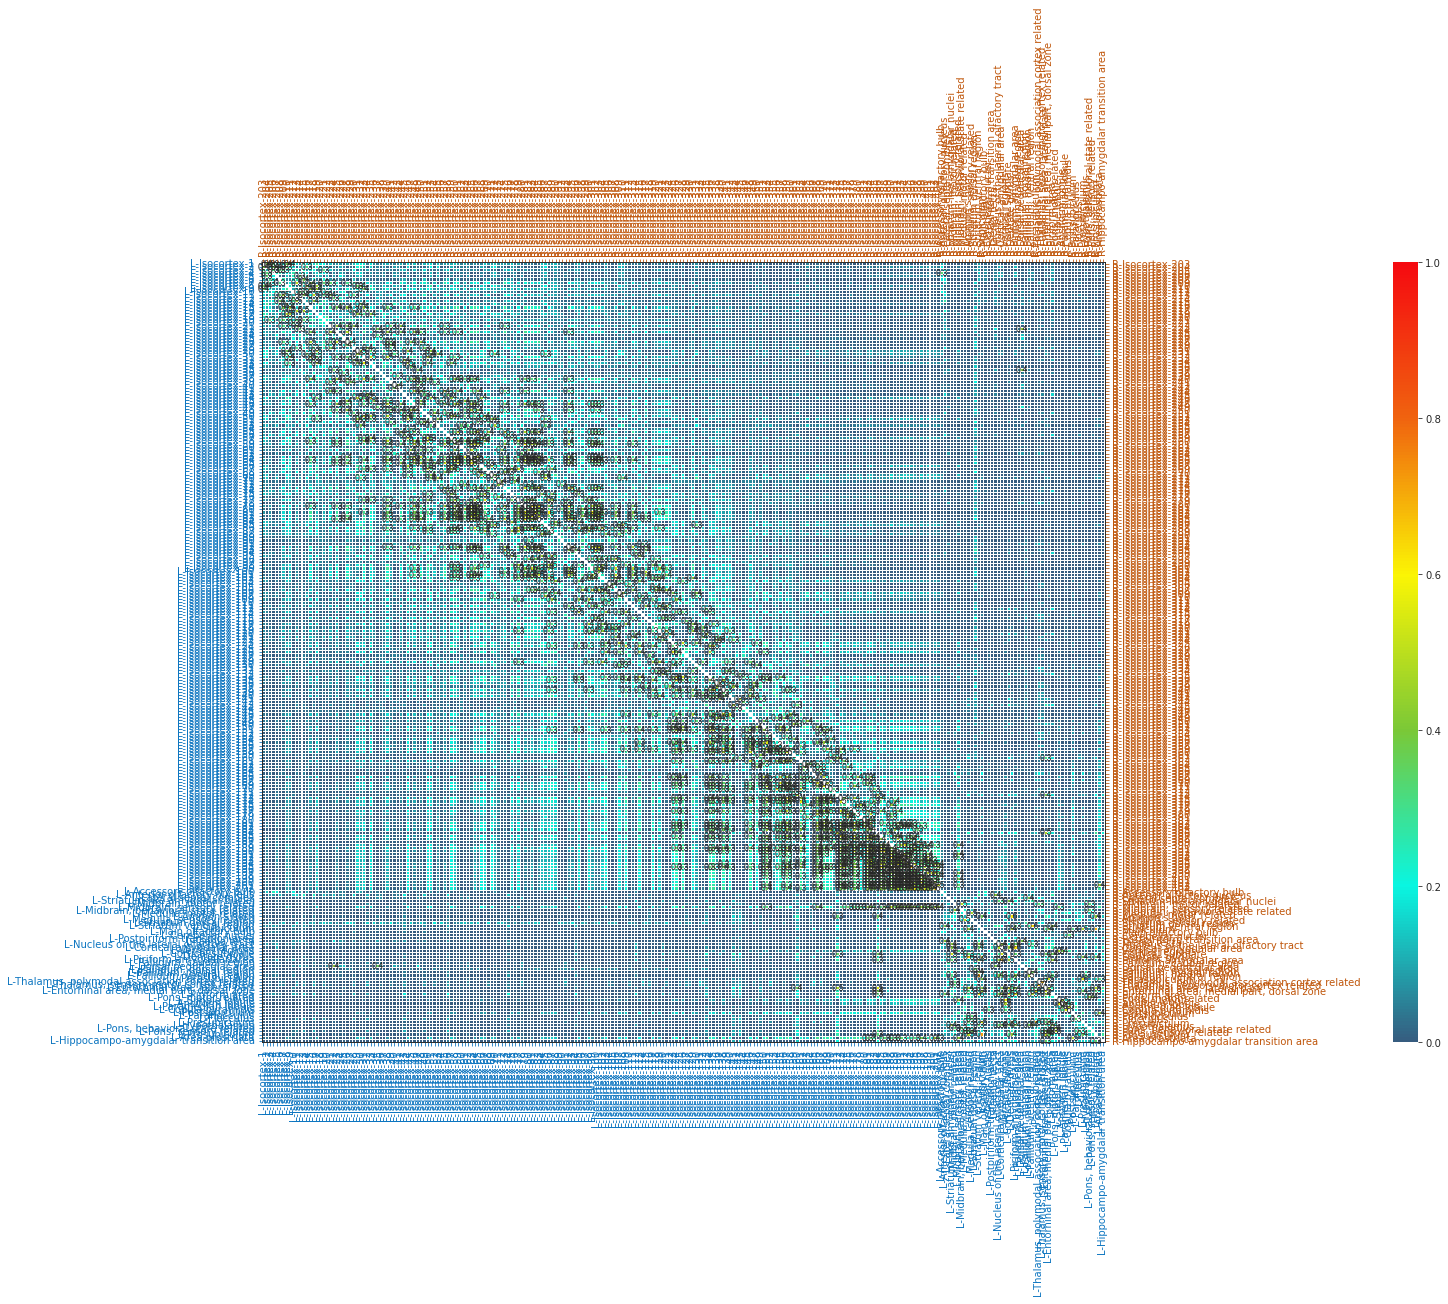

In [74]:
_ = net.fig_within_hemis()

In [84]:
x = mice.allen['mcc'].get_template_volume()[0]

<matplotlib.image.AxesImage object at 0x7fb7fb5608b0>

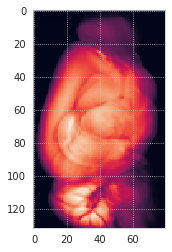

In [87]:
plt.imshow(x.mean(2))

In [92]:
ref = mice.allen['mcc'].get_reference_space()

<matplotlib.image.AxesImage object at 0x7fb7faf59ee0>

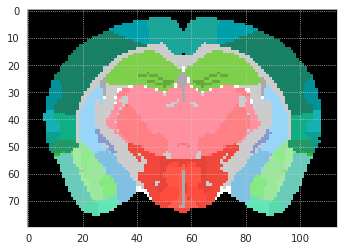

In [99]:
plt.imshow(ref.get_slice_image(0, 7000))

In [100]:
mice.allen['mcc'].

TypeError: get_projection_matrix() missing 1 required positional argument: 'experiment_ids'

In [101]:
from bg_atlasapi import show_atlases, BrainGlobeAtlas

In [102]:
show_atlases()

                                                                                  
                                                                                  
                                Brainglobe Atlases                                
╭──────────────────────────────────┬────────────┬───────────────┬────────────────╮
│ Name                             │ Downloaded │ Local version │ Latest version │
├──────────────────────────────────┼────────────┼───────────────┼────────────────┤
│ allen_cord_20um                  │     ✔      │      1.0      │      1.0       │
│ mpin_zfish_1um                   │     ✔      │      1.0      │      1.0       │
│ example_mouse_100um              │     ✔      │      1.2      │      1.2       │
│ kim_mouse_100um                  │     ✔      │      1.0      │      1.0       │
│ osten_mouse_100um                │     ✔      │      1.1      │      1.1       │
│ allen_mouse_100um                │     ✔      │      1.2      │      1.2       │
│ allen_mouse_10um                 │    ---     │      ---      │      1.2       │
│ allen_mouse_25um                 │    ---     │      ---      │      1.2       │
│ allen_mouse_50um                 │    ---     │      ---      │      1.2       │
│ allen_human_500um                │    ---     │      ---      │      0.1       │
│ kim_mouse_10um                   │    ---     │      ---      │      1.0       │
│ kim_mouse_25um                   │    ---     │      ---      │      1.0       │
│ kim_mouse_50um                   │    ---     │      ---      │      1.0       │
│ osten_mouse_10um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_25um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_50um                 │    ---     │      ---      │      1.1       │
╰──────────────────────────────────┴────────────┴───────────────┴────────────────╯

In [111]:
atlas = BrainGlobeAtlas('kim_mouse_100um')

kim mouse atlas (res. 100um)
From: https://kimlab.io/brain-map/atlas/ (Chon et al. 2019, https://doi.org/10.1038/s41467-019-13057-w )


<matplotlib.image.AxesImage object at 0x7fb7fa64bc40>

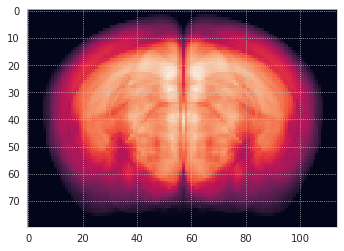

In [114]:
plt.imshow(atlas.reference.mean(0))

In [116]:
list(mice.allen)

[
    'mcc',
    'manifest_file',
    'structure_tree',
    'dims_flat',
    'root',
    'grey',
    'cerebrum',
    'isocortex',
    'template',
    'template_info',
    'annot',
    'annot_info',
    'root_mask',
    'root_mask_info',
    'grey_mask',
    'grey_mask_info',
    'cerebrum_mask',
    'cerebrum_mask_info',
    'isocortex_mask',
    'isocortex_mask_info',
    'onto_info_df',
    'mc_summary_df',
    'expts_df'
]

In [119]:
from allensdk.api.queries.reference_space_api import ReferenceSpaceApi

In [127]:
ref = ReferenceSpaceApi()

In [129]:
ref.build_volumetric_data_download_url('ara_nissl', file_name='ara_nissl_100.nrrd', voxel_resolution=100)

'http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/ara_nissl/ara_nissl_100.nrrd'

In [131]:
[e for e in os.listdir(tmp_dir) if 'nrrd' in e]

['ara_nissl_100.nrrd']

In [135]:
import nrrd
ara, header = nrrd.read(pjoin(tmp_dir, 'ara_nissl_100.nrrd'))
print(ara.shape)
print(header)

(132, 80, 114)

OrderedDict([('type', 'float'), ('dimension', 3), ('space', 'left-posterior-superior'), 
('sizes', array([132,  80, 114])), ('space directions', array([[100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 
'little'), ('encoding', 'gzip'), ('space origin', array([0., 0., 0.]))])

<matplotlib.image.AxesImage object at 0x7fb842cd3490>

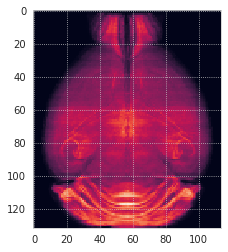

In [160]:
plt.imshow(ara.mean(1))

<matplotlib.colorbar.Colorbar object at 0x7fb7fc3dce50>

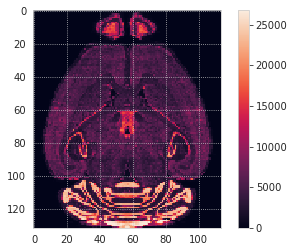

In [168]:
plt.imshow(ara[:, 30, :])
plt.colorbar()

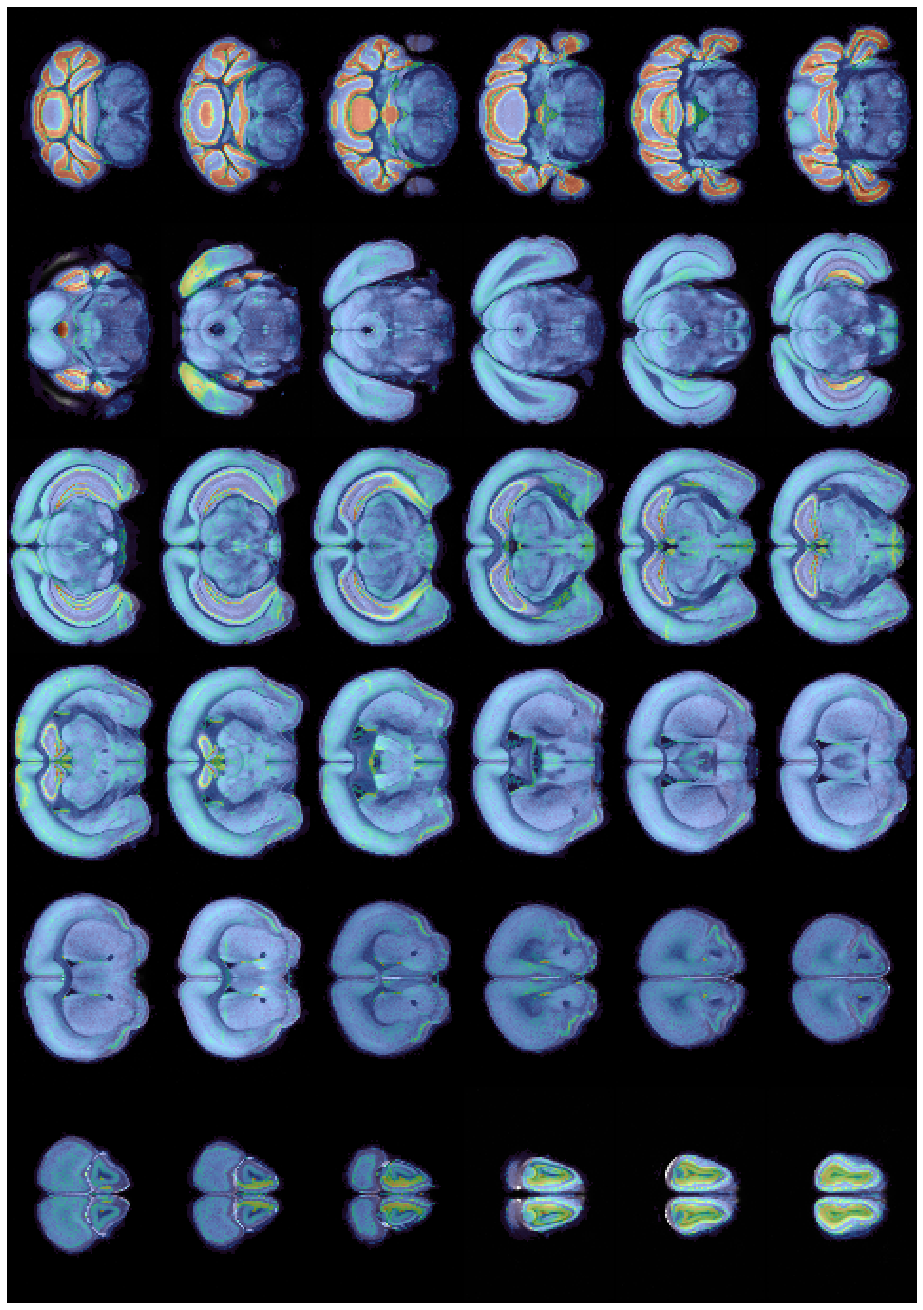

In [184]:
reg.template.plot(
    overlay=ara,
    axis=0,
    overlay_alpha=0.5,
    overlay_cmap='turbo',
    nslices=36,
    figsize=3,
)

In [143]:
ara.dtype

dtype('float32')

In [144]:
ara = reset_ants_img(ara)

In [141]:
from register.register import *

In [142]:
reg = Register(mice)

In [145]:
df_tx, best_tx, perf = reg.fit_register(
    name='testtest',
    mode='3d',
    fixed=ara,
    moving=reg.in_house,
    save_results=False,
    grads=[0.2, 0.5, 0.7, 0.9, 1.2, 1.5],
    types=['SyN', 'ElasticSyN'],
    bins=[16, 32, 50],
    n_seeds=5,
)

testtest, perf:
seed          16
grad         0.7
bins          16
type         SyN
perf    0.457907

In [146]:
warped = ants.apply_transforms(
    fixed=ara,
    moving=reg.in_house,
    transformlist=best_tx['fwdtransforms'],
    interpolator='linear',
)

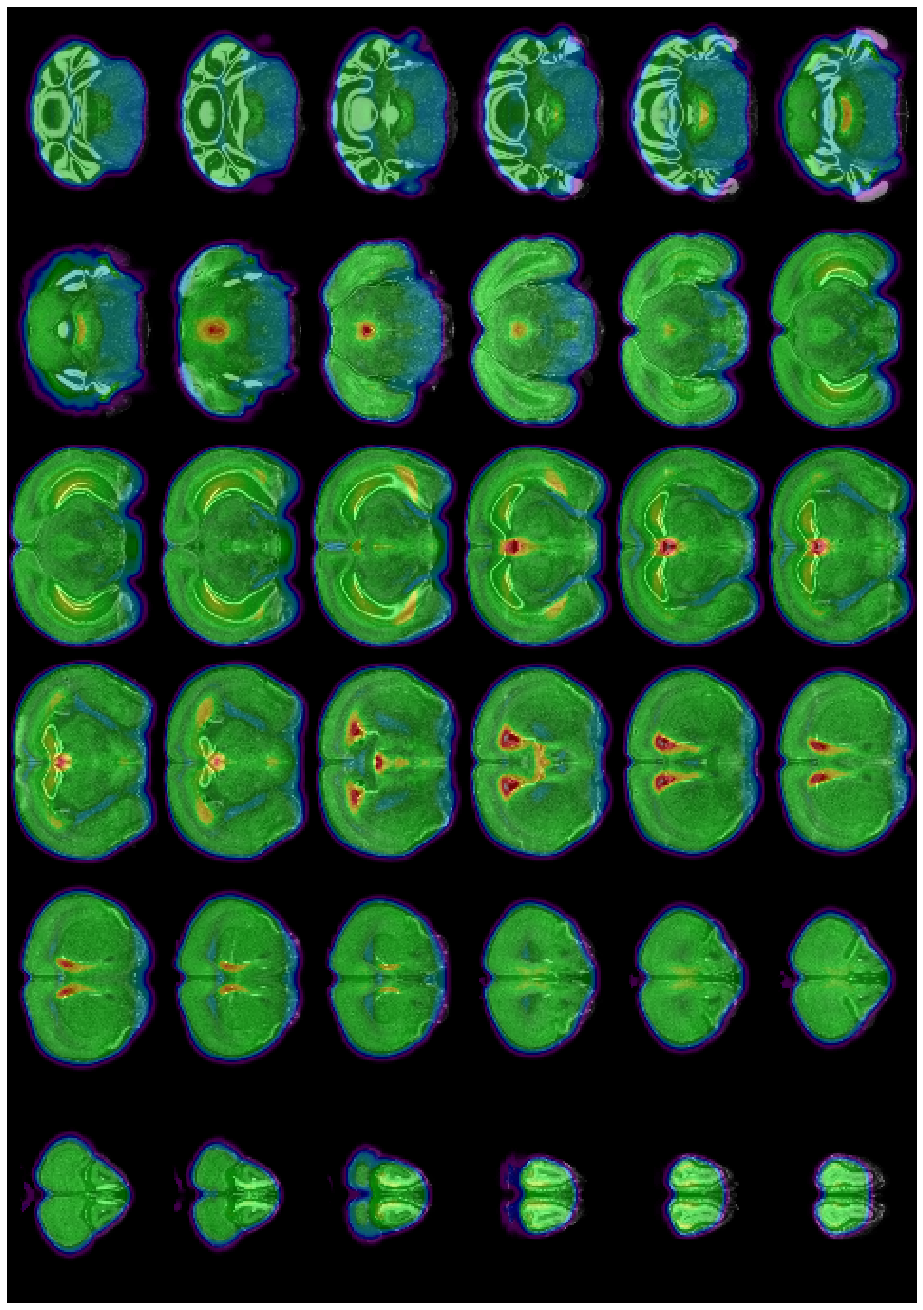

In [157]:
ara.plot(
    overlay=warped,
    axis=0,
    overlay_alpha=0.5,
    overlay_cmap='nipy_spectral',
    nslices=36,
    figsize=3,
)

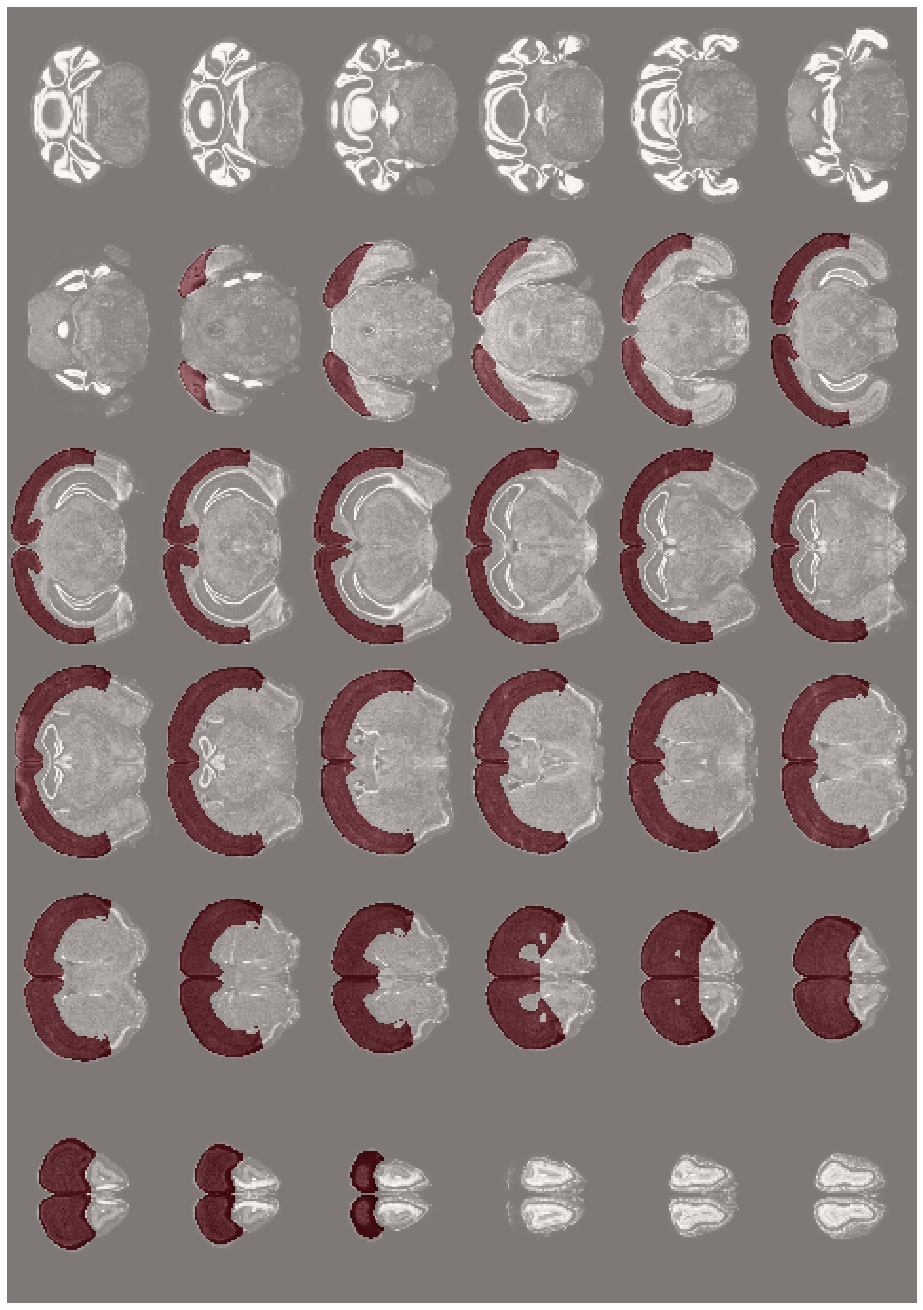

In [156]:
iso = reset_ants_img(mice.allen['isocortex_mask'])

ara.plot(
    overlay=iso,
    axis=0,
    overlay_alpha=0.5,
    overlay_cmap='Reds',
    nslices=36,
    figsize=3,
)

In [158]:
iso_inv = ants.apply_transforms(
    fixed=reg.in_house,
    moving=iso,
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)

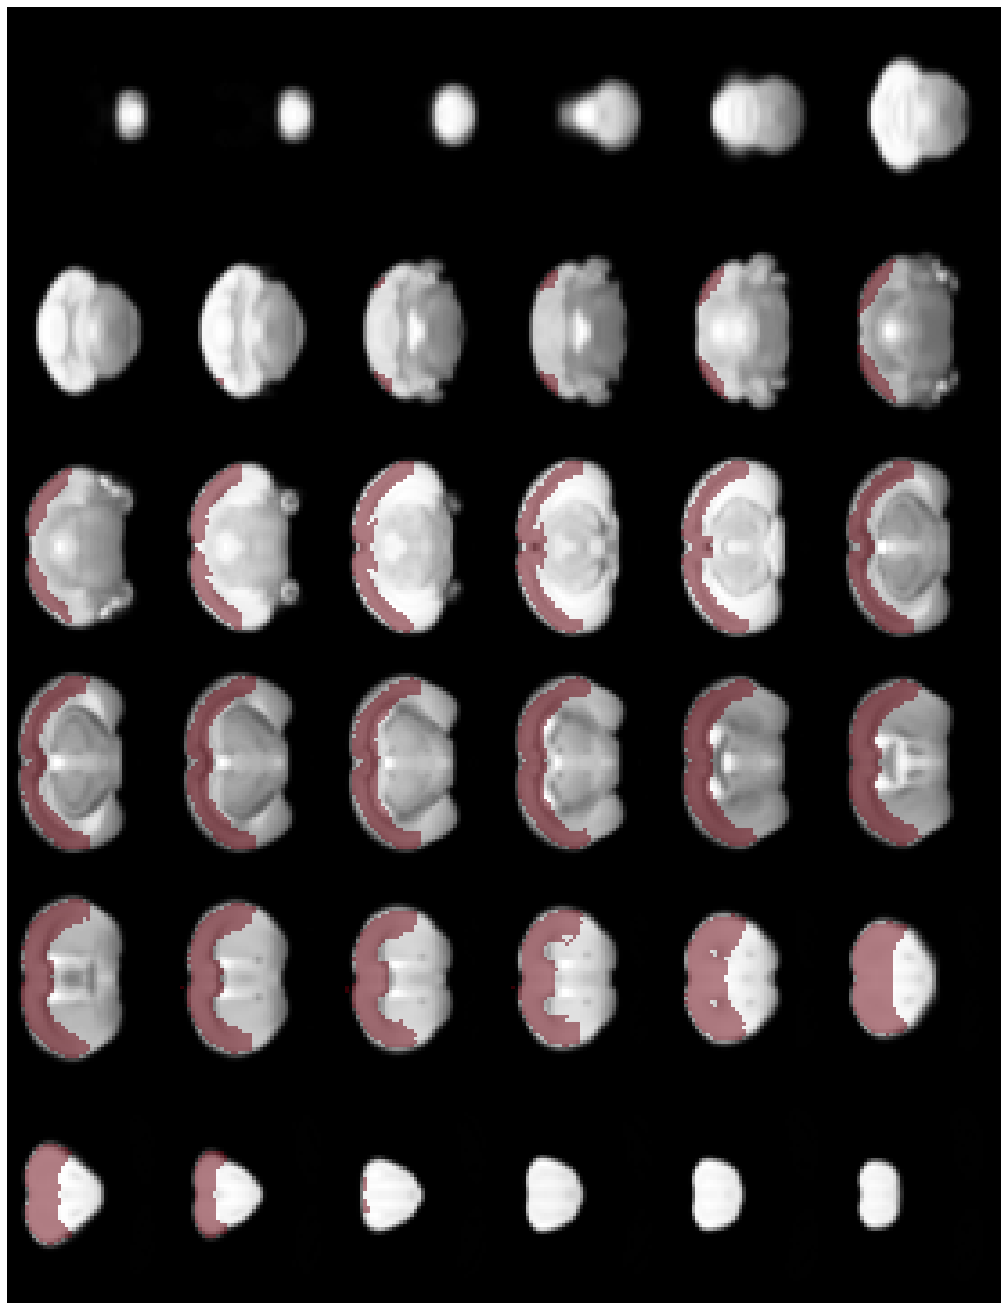

In [159]:
reg.in_house.plot(
    overlay=iso_inv,
    axis=0,
    overlay_alpha=0.5,
    overlay_cmap='Reds',
    nslices=36,
    figsize=3,
)

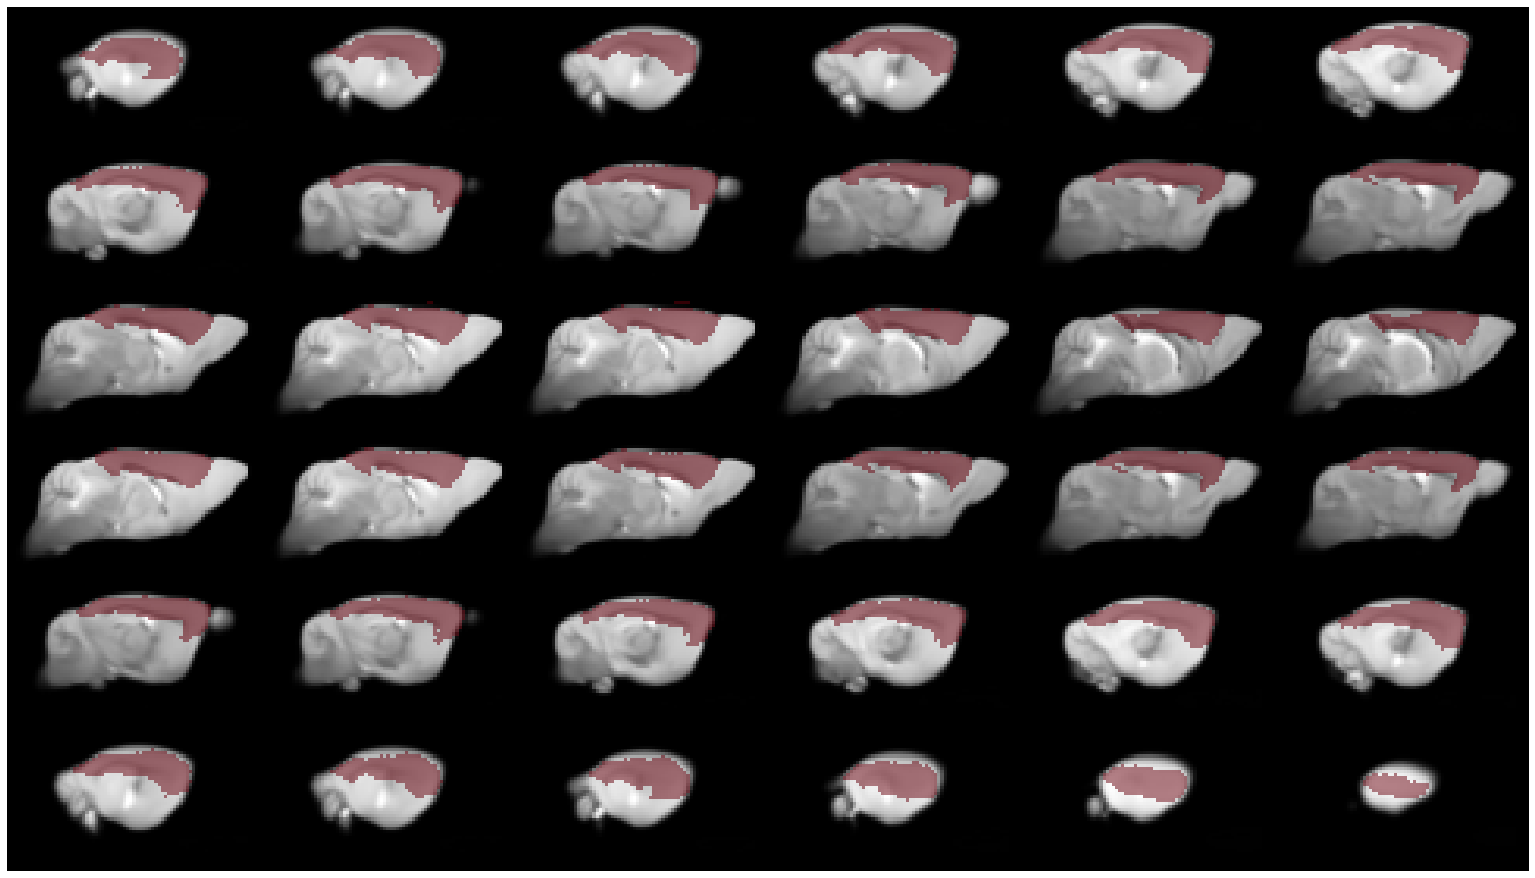

In [170]:
reg.in_house.plot(
    overlay=iso_inv,
    axis=2,
    overlay_alpha=0.5,
    overlay_cmap='Reds',
    nslices=36,
    figsize=2,
)

### ARA 2 Yale

In [171]:
df_tx, tx, perf = reg.fit_register(
    name='ara2yale',
    mode='3d',
    fixed=reg.in_house,
    moving=ara,
    save_results=False,
    grads=[0.2, 0.5, 0.7, 0.9, 1.2, 1.5],
    types=['SyN', 'ElasticSyN'],
    bins=[16, 32, 50],
    n_seeds=5,
)

ara2yale, perf:
seed             4
grad           0.2
bins            16
type    ElasticSyN
perf      0.494475

In [174]:
warped = ants.apply_transforms(
    fixed=reg.in_house,
    moving=ara,
    transformlist=tx['fwdtransforms'],
    interpolator='linear',
)

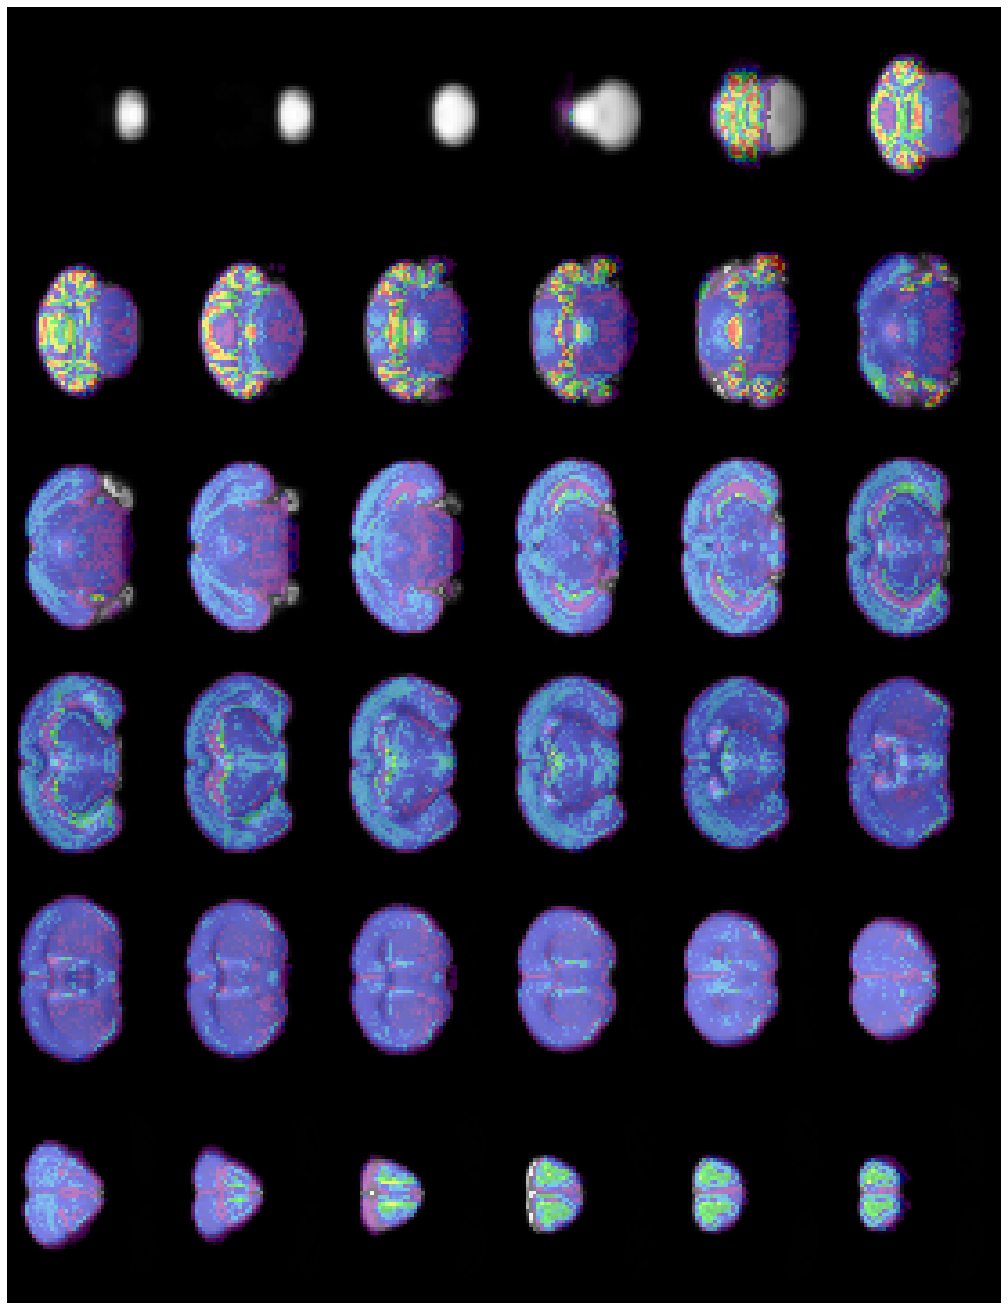

In [175]:
reg.in_house.plot(
    overlay=warped,
    axis=0,
    overlay_alpha=0.5,
    overlay_cmap='nipy_spectral',
    nslices=36,
    figsize=3,
)

In [177]:
iso_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=iso,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)

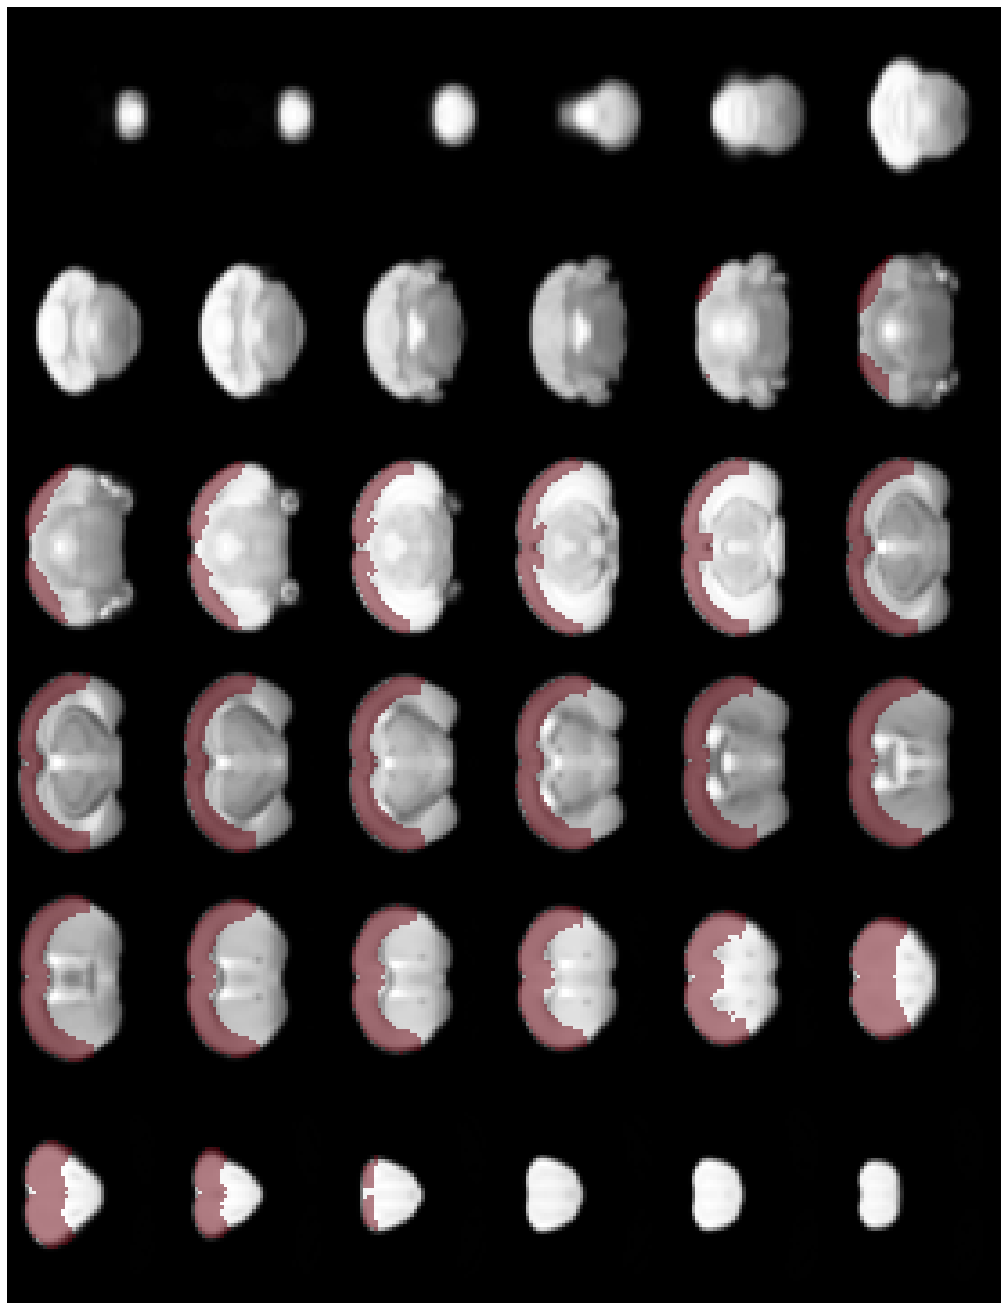

In [178]:
reg.in_house.plot(
    overlay=iso_yale,
    axis=0,
    overlay_alpha=0.5,
    overlay_cmap='Reds',
    nslices=36,
    figsize=3,
)

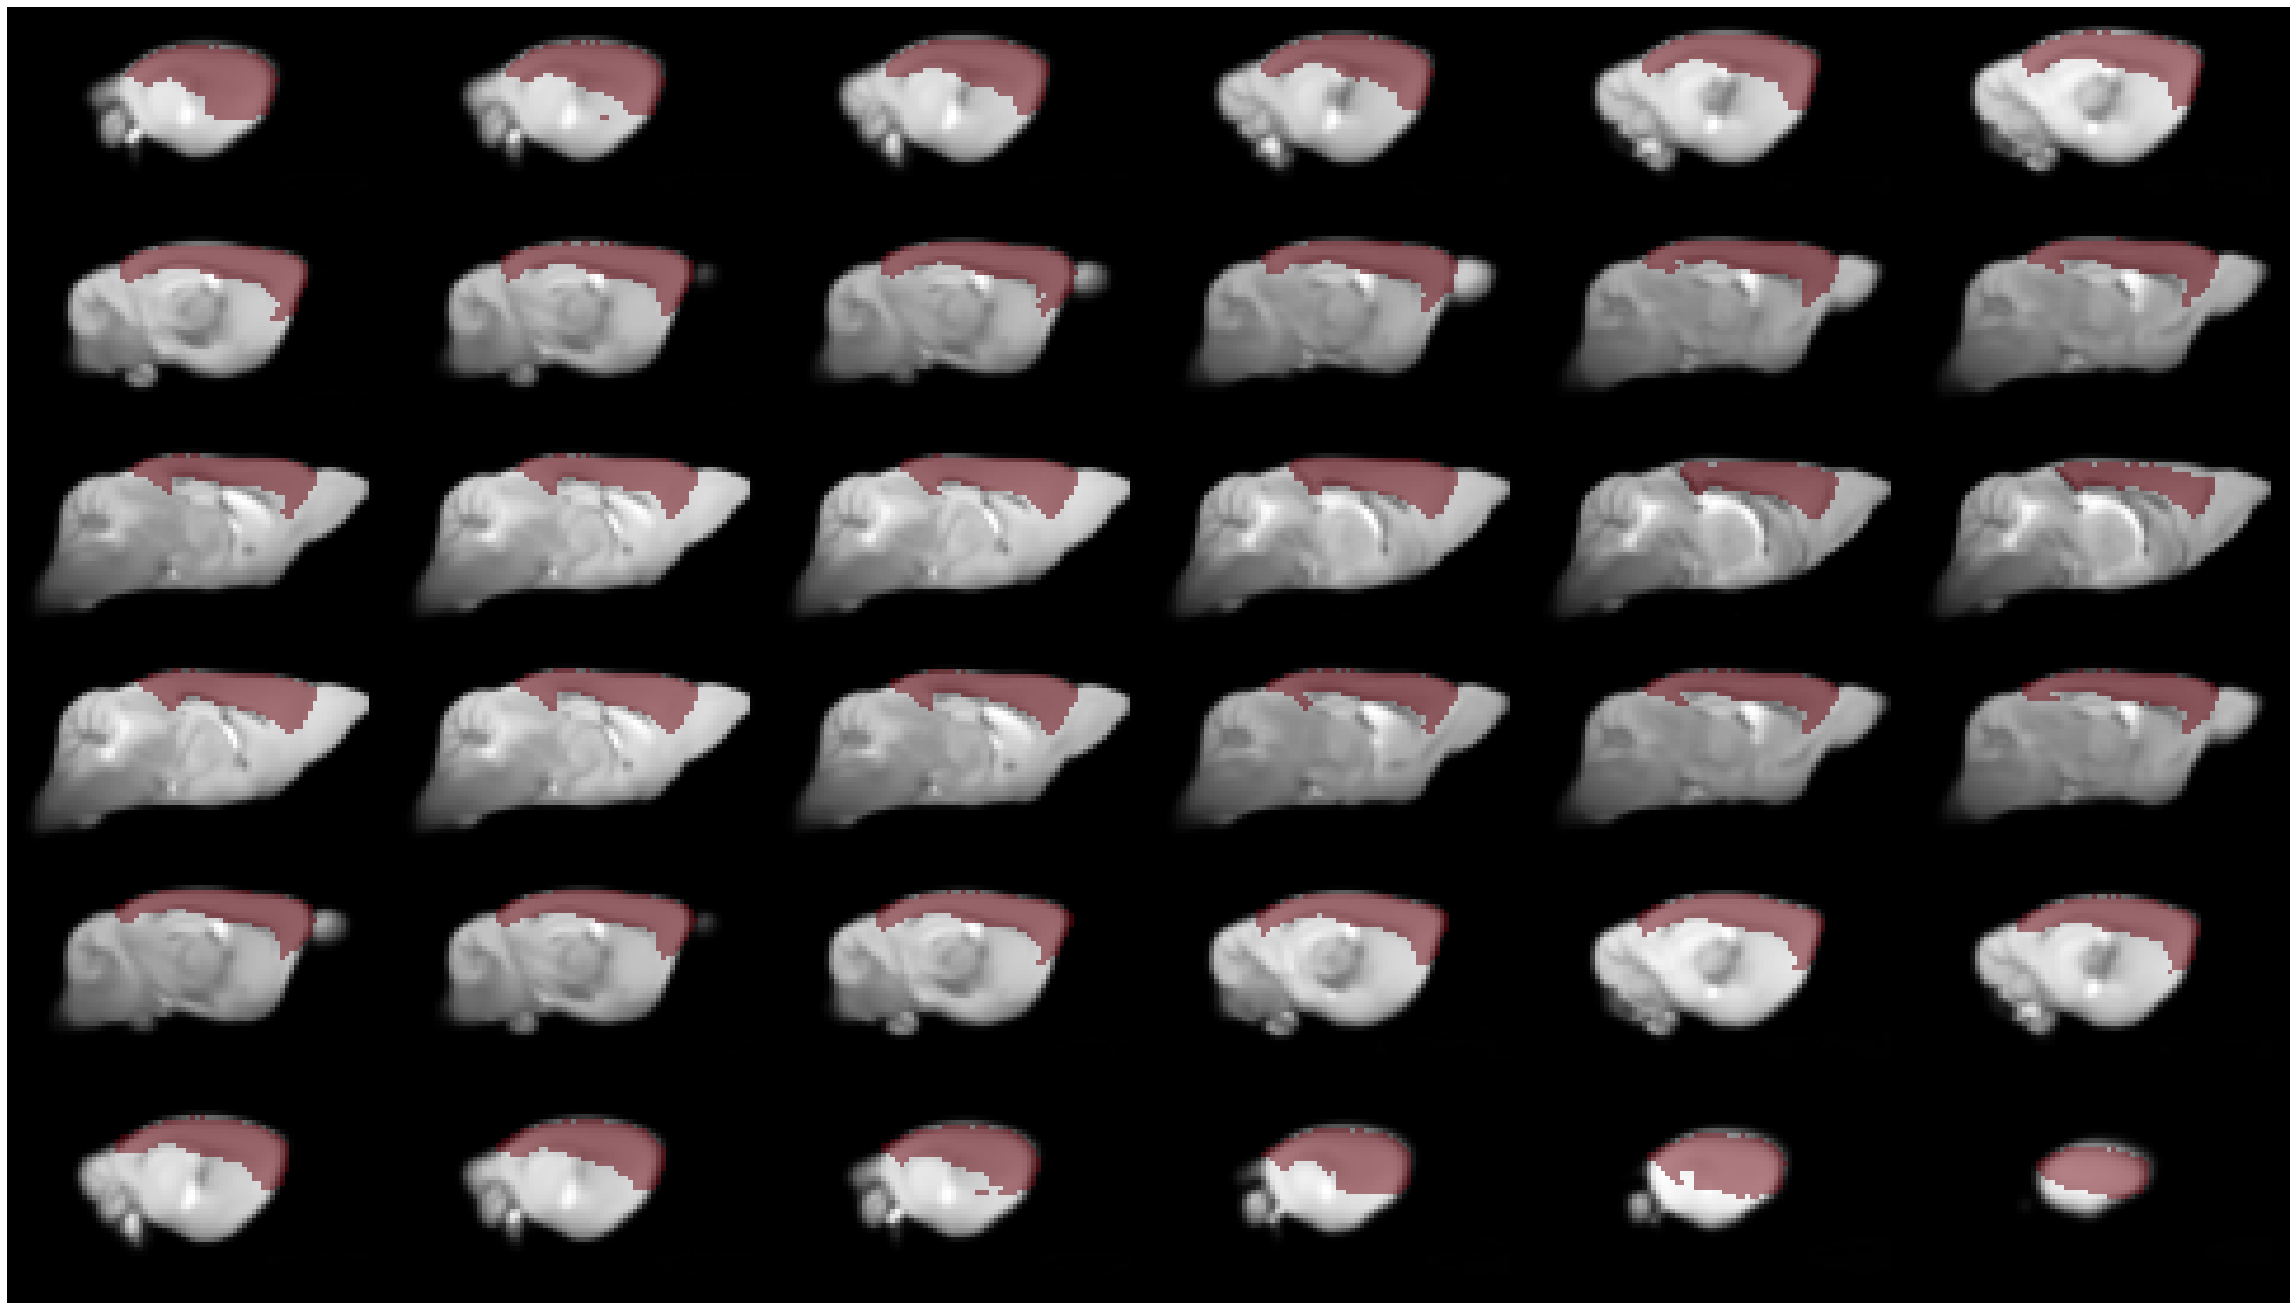

In [180]:
reg.in_house.plot(
    overlay=iso_yale,
    axis=2,
    overlay_alpha=0.5,
    overlay_cmap='Reds',
    nslices=36,
    figsize=3,
)

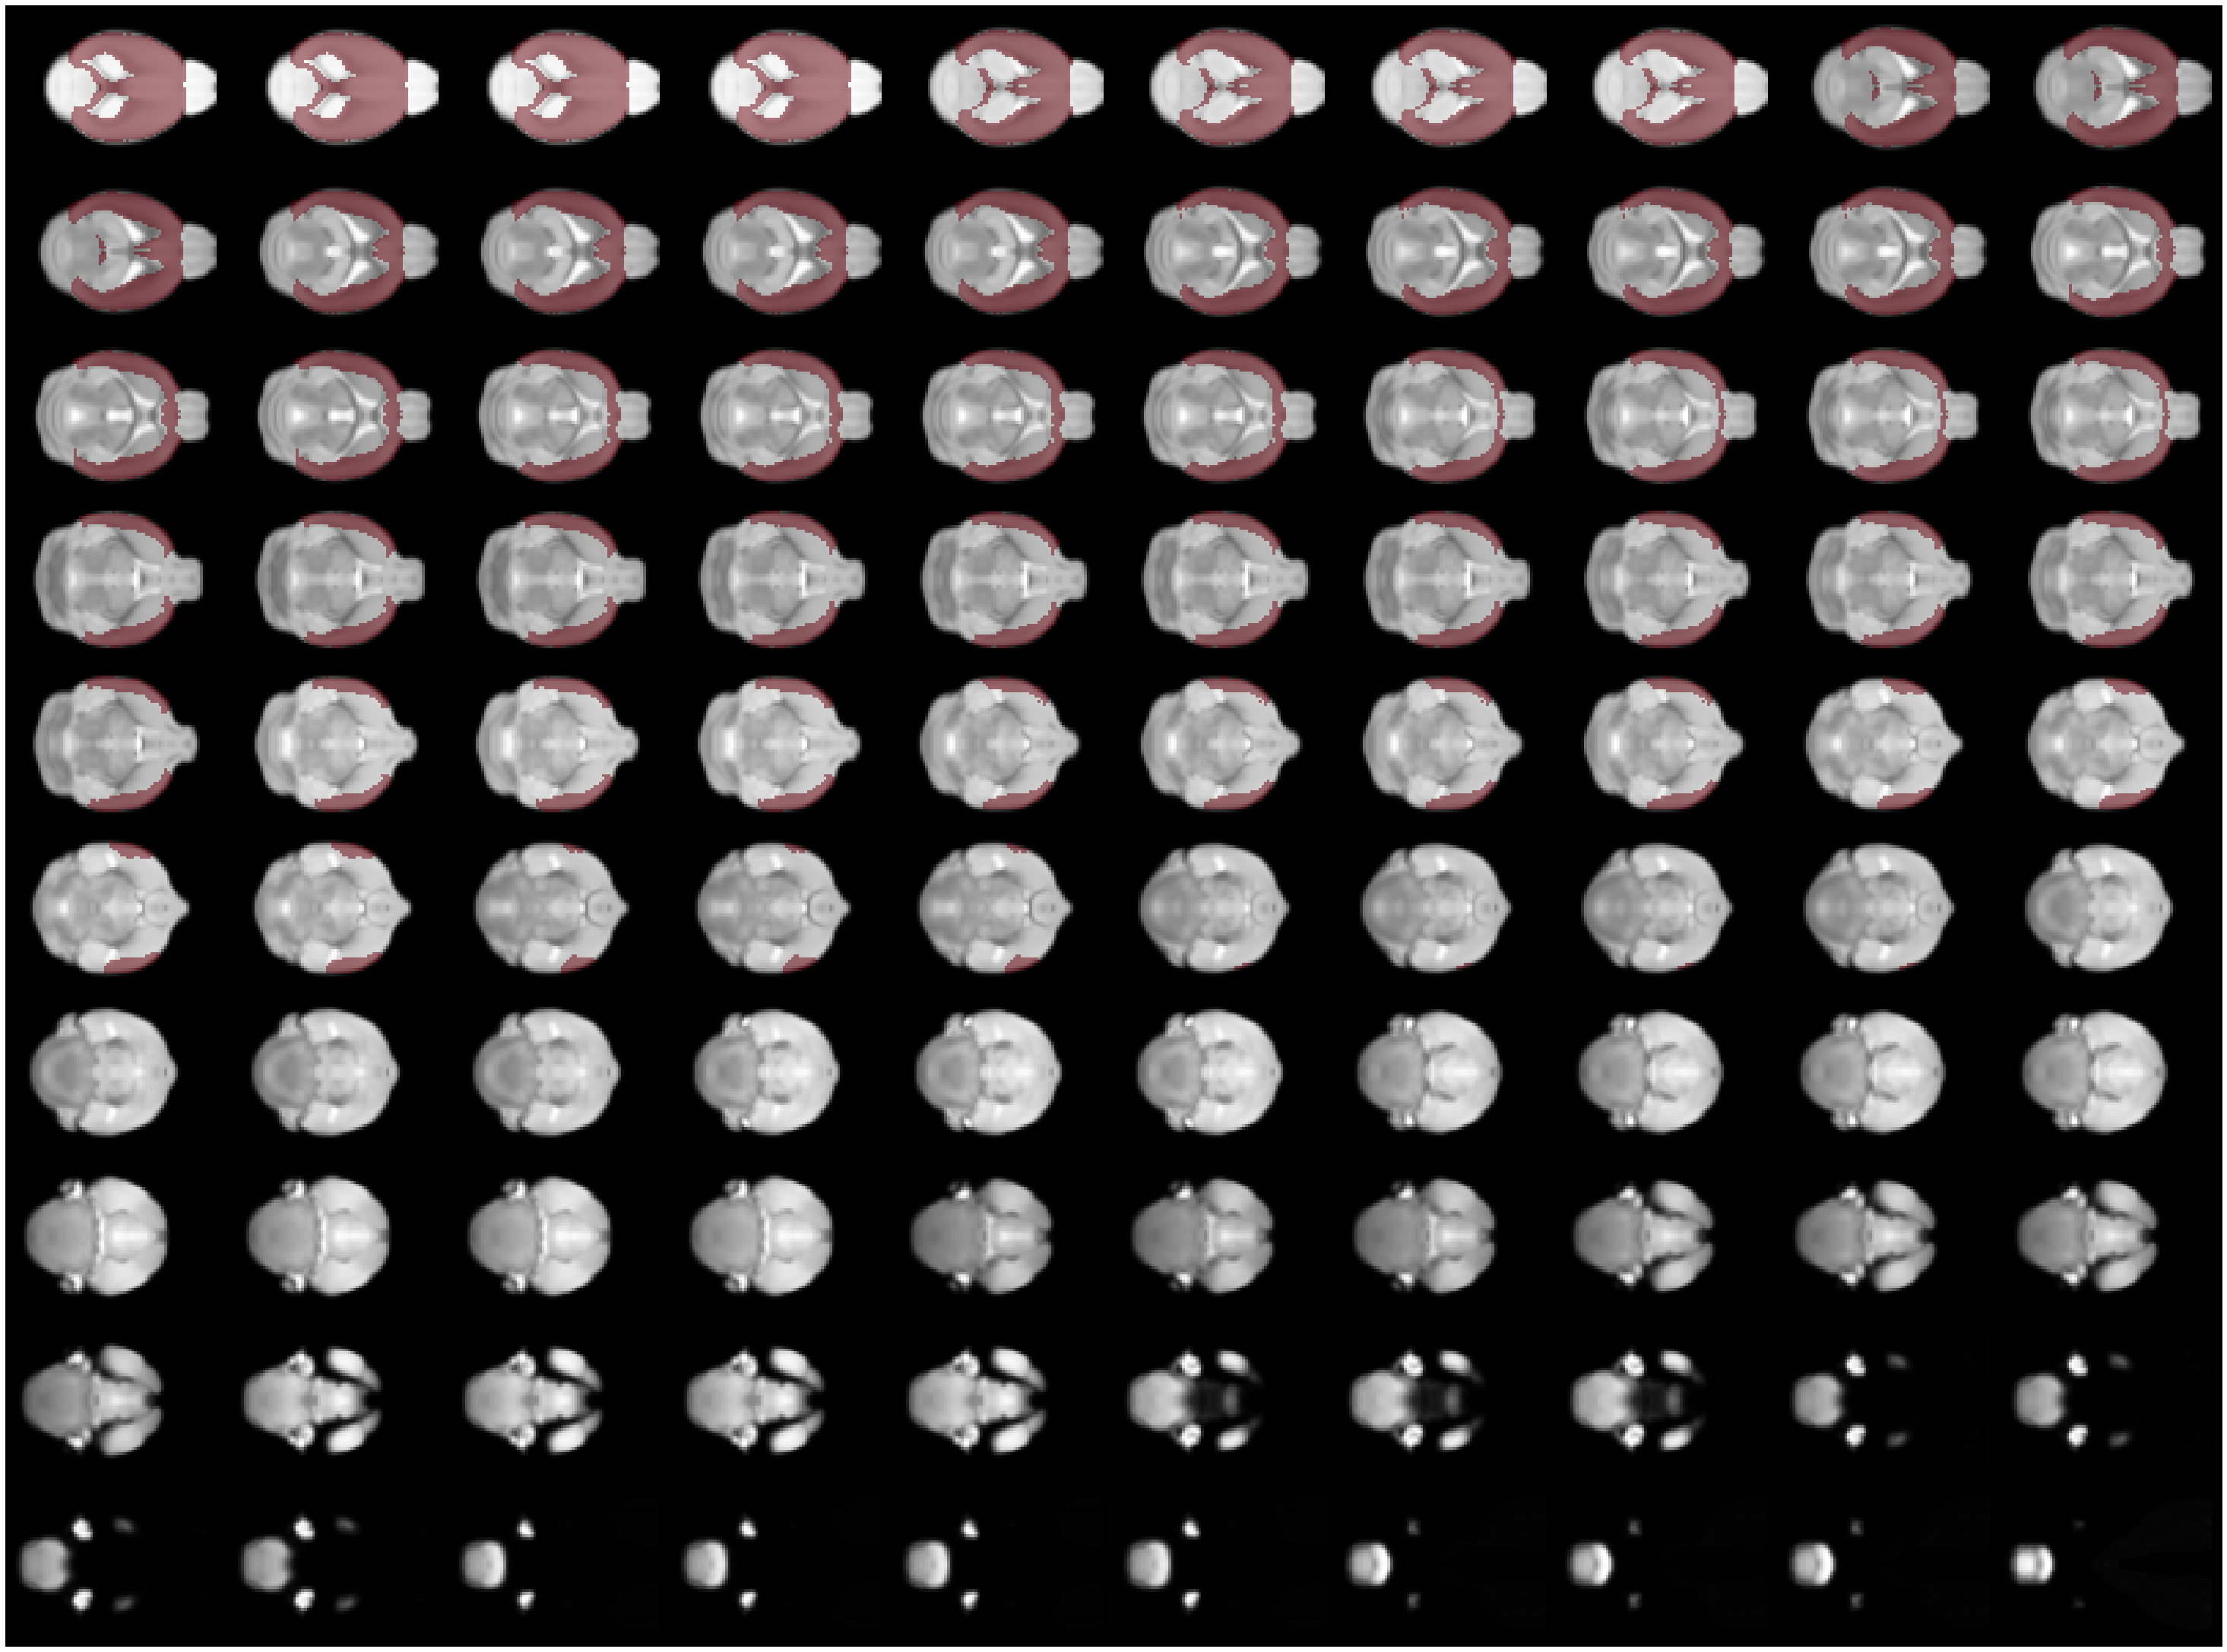

In [187]:
reg.in_house.plot(
    overlay=iso_yale,
    axis=1,
    overlay_alpha=0.5,
    overlay_cmap='Reds',
    nslices=100,
    figsize=3,
)

### Now repeat every step but for 0.1 mm

## Mice

In [4]:
svinet_props = {
    'task': 'rest',
    'mode': 'bold',
    'metric': 'pearson',
    'match_metric': 'euclidean',
    'graph_type': 'real',
}
mice = Mice(Config(404))
mice.combine_dfs(svinet_props.get('task', 'rest'), full=True)

In [5]:
k = 6
p = 20
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
num_nodes = len(svinet.adj)

group_dir = get_svinet_group_dir(
    results_dir=mice.cfg.results_dir,
    k=k,
    p=p,
    graph_type=svinet_props.get('graph_type', 'real'),
)
print(group_dir)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-404/results/SVINET/gr
oup_results/real-p20-k6

## Load group results

In [9]:
available = [
    e for e in os.listdir(group_dir)
    if '(0.2,1.0;4)' in e
]
file = sorted(available, key=sort_date_latest)[-1]
group = np.load(pjoin(group_dir, file), allow_pickle=True).item()

print(file)

group_bins(0.2,1.0;4)_(2021_09_19).npy

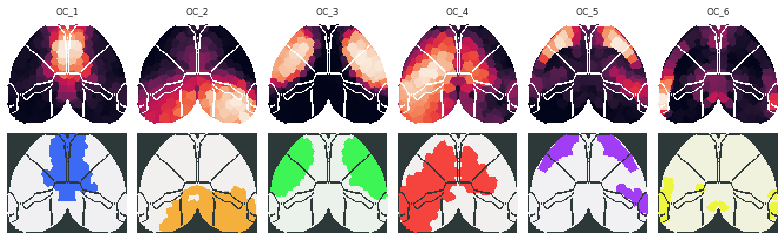

In [10]:
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
svinet.show(group['pi_avg'], figsize=(11, 3.5))

In [11]:
svinets = load_svinet_all(mice, k, p, **svinet_props)

  0%|          | 0/158 [00:00<?, ?it/s]

Warning, fits dir is empty

Warning, fits dir is empty

Warning, fits dir is empty

In [12]:
gam_aggr = collections.defaultdict(list)

for key, sv in svinets.items():
    try:
        sub, ses, run = mice.looper[key]
    except KeyError:
        sub, run = -1, -1
        ses = int(key.split('-')[1])
    if run == -1:
        continue
    gam_aggr[mice.get_key(sub, ses)].append(np.expand_dims(sv.gam, 0))
gam_aggr = {key: np.concatenate(x) for key, x in gam_aggr.items()}

In [13]:
gam = np.empty((
    mice.cfg.num_subjects,
    mice.cfg.num_sessions,
    k, num_nodes,
))
for key, x in gam_aggr.items():
    sub, ses, _ = mice.looper[key]
    gam[sub - 1, ses - 1] = np.nanmean(x, 0)

gam_avg = np.nanmean(np.nanmean(gam, 1), 0)
pi_avg = gam_avg / np.nansum(gam_avg, 0, keepdims=True)

pi_avg.shape, gam_avg.shape, gam.shape

((6, 502), (6, 502), (10, 3, 6, 502))

In [14]:
group['gam'] = gam
group['gam_avg'] = gam_avg
group['pi_avg'] = pi_avg

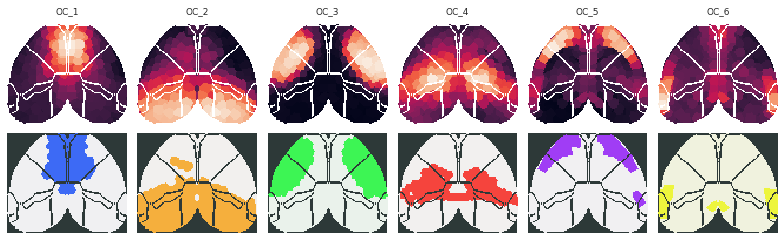

In [15]:
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
svinet.show(group['pi_avg'], figsize=(11, 3.5))

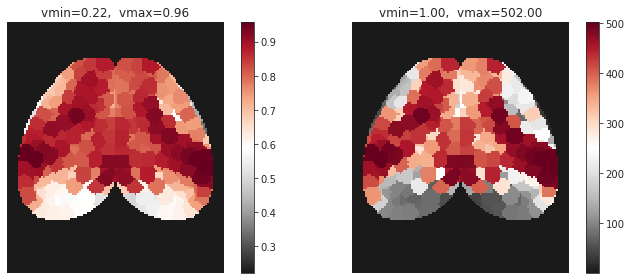

In [16]:
eh = entropy_expect_beta(gam_avg)
ehr = sp_stats.rankdata(eh)

fig, axes = create_figure(1, 2, (10, 4))

for i, ax in enumerate(axes.ravel()):
    data2plt = eh if i == 0 else ehr
    mask = svinet.pi2arr(data2plt.reshape(1, -1), cortex_only=True)[1]
    im = ax.imshow(mask, vmin=min(data2plt), vmax=max(data2plt), cmap='RdGy_r')
    plt.colorbar(im, ax=ax)
    ax.set_title(f"vmin={min(data2plt):0.2f},  vmax={max(data2plt):0.2f}")
remove_ticks(axes)

In [17]:
eh.shape

(502,)

In [18]:
l2h_sorted = dict(sorted(zip(svinet.l2n, eh), key=lambda x: x[1]))

In [20]:
cortical_region_overlaps = mice.parcel.get_region_overlap()

  0%|          | 0/404 [00:00<?, ?it/s]

In [21]:
for region, val in l2h_sorted.items():
    if str(315) not in region:
        continue
    region_i = int(region.split('-')[-1])
    print(region, np.round(val, 3), cortical_region_overlaps[region_i])

1-315-284 0.222
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

1-315-294 0.24
{'SS': 100.0, 'SSs': 100.0}

1-315-282 0.262
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 83.0}

1-315-303 0.275
{'SS': 100.0, 'SSs': 96.0}

0-315-63 0.275
{'SS': 96.0, 'SSp': 96.0, 'SSp-m': 96.0}

1-315-301 0.285
{'SS': 100.0, 'SSs': 71.0, 'SSp': 29.0, 'SSp-n': 25.0}

1-315-281 0.286
{'SS': 100.0, 'SSs': 59.0, 'SSp': 41.0, 'SSp-m': 41.0}

1-315-285 0.292
{'SS': 100.0, 'SSs': 90.0}

1-315-265 0.305
{'SS': 87.0, 'SSp': 87.0, 'SSp-m': 87.0}

1-315-283 0.309
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 90.0}

0-315-82 0.328
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

0-315-61 0.329
{'MO': 96.0, 'MOp': 96.0}

1-315-308 0.329
{'SS': 100.0, 'SSp': 89.0, 'SSp-n': 89.0}

0-315-45 0.33
{'MO': 100.0, 'MOp': 91.0}

1-315-313 0.332
{'SS': 100.0, 'SSs': 100.0}

1-315-267 0.337
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

1-315-261 0.34
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

1-315-302 0.342
{'VISC': 69.0, 'SS': 30.0, 'SSs': 30.0}

0-315-80 0.346
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 96.0}

1-315-298 0.354
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 86.0}

1-315-295 0.37
{'GU': 35.0, 'VISC': 33.0, 'SS': 32.0, 'SSs': 32.0}

1-315-317 0.378
{'SS': 62.0, 'SSs': 62.0, 'VISC': 38.0}

1-315-263 0.391
{'MO': 100.0, 'MOp': 100.0}

1-315-266 0.394
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

0-315-101 0.4
{'SS': 100.0, 'SSs': 100.0}

0-315-48 0.402
{'MO': 99.0, 'MOp': 99.0}

0-315-92 0.412
{'SS': 100.0, 'SSs': 100.0}

1-315-247 0.418
{'MO': 100.0, 'MOp': 80.0}

0-315-65 0.42
{'SS': 100.0, 'SSp': 98.0, 'SSp-m': 98.0}

1-315-275 0.421
{'SS': 56.0, 'SSs': 56.0, 'GU': 34.0}

0-315-96 0.423
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 93.0}

1-315-257 0.433
{'SS': 85.0, 'SSp': 58.0, 'SSp-m': 58.0, 'SSs': 26.0}

0-315-83 0.44
{'SS': 100.0, 'SSs': 95.0}

0-315-59 0.442
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

0-315-79 0.443
{'SS': 100.0, 'SSs': 66.0, 'SSp': 34.0, 'SSp-m': 34.0}

0-315-106 0.443
{'SS': 100.0, 'SSp': 81.0, 'SSp-n': 81.0}

1-315-250 0.445
{'MO': 100.0, 'MOp': 100.0}

1-315-323 0.454
{'SS': 100.0, 'SSs': 100.0}

1-315-394 0.457
{'VIS': 65.0, 'RSP': 35.0}

1-315-248 0.472
{'MO': 54.0, 'MOp': 54.0, 'SS': 46.0, 'SSp': 46.0, 'SSp-m': 46.0}

1-315-240 0.475
{'MO': 100.0, 'MOp': 100.0}

1-315-288 0.481
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 68.0, 'SSp-m': 32.0}

1-315-260 0.487
{'SS': 57.0, 'SSp': 57.0, 'SSp-m': 51.0, 'MO': 42.0, 'MOp': 42.0}

1-315-390 0.496
{'RSP': 100.0}

0-315-46 0.506
{'SS': 58.0, 'SSp': 58.0, 'SSp-m': 58.0, 'MO': 42.0, 'MOp': 42.0}

1-315-321 0.507
{'SS': 100.0, 'SSs': 98.0}

0-315-26 0.514
{'MO': 100.0, 'MOs': 59.0, 'MOp': 41.0}

1-315-395 0.517
{'VIS': 100.0}

0-315-73 0.519
{'SS': 60.0, 'SSs': 60.0, 'GU': 28.0}

1-315-384 0.522
{'VIS': 100.0}

0-315-192 0.524
{'VIS': 81.0}

0-315-188 0.524
{'RSP': 100.0}

0-315-93 0.525
{'VISC': 36.0, 'SS': 32.0, 'SSs': 32.0, 'GU': 32.0}

1-315-401 0.531
{'RSP': 52.0, 'VIS': 48.0}

1-315-377 0.536
{'RSP': 100.0}

1-315-396 0.544
{'VIS': 100.0}

0-315-175 0.546
{'RSP': 100.0}

1-315-393 0.55
{'RSP': 85.0}

1-315-399 0.557
{'RSP': 75.0, 'VIS': 25.0}

1-315-225 0.562
{'MO': 100.0, 'MOp': 100.0}

0-315-100 0.562
{'VISC': 69.0, 'SS': 31.0, 'SSs': 31.0}

1-315-383 0.566
{'VIS': 100.0}

0-315-190 0.57
{'VIS': 100.0}

0-315-182 0.571
{'VIS': 100.0}

0-315-193 0.572
{'VIS': 100.0}

1-315-368 0.572
{'VIS': 100.0}

0-315-178 0.574
{'VIS': 78.0, 'RSP': 22.0}

0-315-68 0.575
{'GU': 80.0}

0-315-186 0.576
{'VIS': 100.0}

1-315-228 0.581
{'MO': 100.0, 'MOs': 73.0, 'MOp': 27.0}

0-315-55 0.582
{'SS': 88.0, 'SSp': 50.0, 'SSp-m': 50.0, 'SSs': 38.0}

1-315-392 0.583
{'VIS': 100.0}

1-315-279 0.584
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 61.0, 'SSp-ul': 23.0}

0-315-42 0.584
{'SS': 52.0, 'SSp': 52.0, 'SSp-m': 52.0, 'MO': 48.0, 'MOp': 48.0}

0-315-197 0.587
{'RSP': 61.0, 'VIS': 39.0}

1-315-320 0.589
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 74.0, 'SSp-n': 26.0}

0-315-194 0.589
{'VIS': 100.0}

0-315-191 0.59
{'RSP': 74.0, 'VIS': 26.0}

0-315-199 0.59
{'VIS': 59.0, 'RSP': 41.0}

0-315-34 0.593
{'MO': 100.0, 'MOs': 100.0}

1-315-402 0.598
{'VIS': 100.0}

1-315-244 0.599
{'MO': 60.0, 'MOp': 60.0, 'SS': 40.0, 'SSp': 40.0, 'SSp-m': 40.0}

0-315-200 0.599
{'VIS': 100.0}

0-315-81 0.6
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 88.0}

0-315-111 0.6
{'SS': 100.0, 'SSs': 100.0}

1-315-403 0.601
{'VIS': 78.0, 'RSP': 22.0}

0-315-181 0.605
{'VIS': 100.0}

1-315-304 0.61
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 95.0}

0-315-195 0.61
{'VIS': 100.0}

1-315-404 0.613
{'VIS': 100.0}

0-315-201 0.614
{'VIS': 90.0}

1-315-397 0.614
{'VIS': 100.0}

1-315-380 0.617
{'VIS': 56.0, 'RSP': 44.0}

0-315-202 0.618
{'VIS': 100.0}

0-315-64 0.62
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

0-315-177 0.62
{'VIS': 93.0}

1-315-217 0.621
{'MO': 100.0, 'MOs': 99.0}

0-315-185 0.623
{'VIS': 100.0}

0-315-198 0.631
{'VIS': 100.0}

1-315-270 0.632
{'GU': 75.0, 'AI': 25.0}

1-315-242 0.632
{'PL': 80.0, 'ACA': 20.0}

0-315-23 0.632
{'MO': 100.0, 'MOp': 100.0}

1-315-388 0.632
{'VIS': 100.0}

1-315-233 0.635
{'MO': 100.0, 'MOs': 72.0, 'MOp': 28.0}

1-315-252 0.635
{'MO': 100.0, 'MOp': 100.0}

0-315-166 0.636
{'VIS': 100.0}

0-315-115 0.637
{'SS': 60.0, 'SSs': 60.0, 'VISC': 40.0}

0-315-72 0.639
{'MO': 85.0, 'MOp': 85.0}

1-315-400 0.645
{'VIS': 100.0}

0-315-121 0.649
{'SS': 100.0, 'SSs': 100.0}

0-315-99 0.649
{'SS': 100.0, 'SSs': 80.0}

1-315-387 0.65
{'VIS': 100.0}

0-315-189 0.651
{'TEa': 72.0, 'VIS': 28.0}

1-315-324 0.652
{'VISC': 78.0, 'SS': 22.0, 'SSs': 22.0}

0-315-54 0.652
{'MO': 100.0, 'MOp': 66.0, 'MOs': 34.0}

1-315-255 0.659
{'ACA': 100.0}

0-315-43 0.659
{'AI': 100.0}

0-315-90 0.663
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 90.0}

0-315-52 0.664
{'AI': 35.0, 'MO': 33.0, 'MOp': 33.0, 'GU': 29.0}

1-315-292 0.664
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 99.0}

1-315-370 0.666
{'VIS': 100.0}

0-315-40 0.67
{'PL': 76.0, 'ACA': 24.0}

0-315-21 0.671
{'MO': 99.0, 'MOp': 99.0}

1-315-243 0.672
{'PL': 71.0, 'ACA': 23.0}

0-315-168 0.676
{'VIS': 100.0}

0-315-53 0.681
{'ACA': 98.0}

1-315-381 0.682
{'RSP': 100.0}

1-315-352 0.682
{'VIS': 54.0, 'PTLp': 29.0}

1-315-216 0.683
{'PL': 92.0}

0-315-16 0.684
{'AI': 86.0}

1-315-239 0.684
{'MO': 90.0, 'MOs': 90.0}

0-315-150 0.685
{'VIS': 59.0, 'PTLp': 38.0}

1-315-322 0.686
{'VISC': 72.0, 'AI': 28.0}

0-315-49 0.688
{'AI': 53.0, 'GU': 45.0}

1-315-274 0.691
{'MO': 91.0, 'MOp': 91.0}

0-315-174 0.691
{'AUD': 86.0}

0-315-155 0.696
{'PTLp': 90.0}

1-315-391 0.696
{'TEa': 61.0, 'VIS': 39.0}

0-315-39 0.696
{'AI': 65.0, 'MO': 35.0, 'MOp': 34.0}

0-315-28 0.697
{'AI': 92.0}

0-315-179 0.697
{'RSP': 100.0}

0-315-32 0.704
{'AI': 100.0}

1-315-218 0.704
{'AI': 72.0, 'ORB': 28.0}

0-315-183 0.704
{'AUD': 71.0, 'TEa': 29.0}

0-315-173 0.707
{'VIS': 74.0, 'AUD': 26.0}

0-315-157 0.707
{'SS': 56.0, 'SSp': 56.0, 'SSp-bfd': 56.0, 'PTLp': 34.0}

0-315-151 0.708
{'PTLp': 52.0, 'SS': 48.0, 'SSp': 48.0, 'SSp-bfd': 48.0}

0-315-24 0.709
{'PL': 59.0, 'ORB': 25.0}

0-315-15 0.709
{'MO': 100.0, 'MOs': 93.0}

1-315-269 0.709
{'SS': 62.0, 'SSp': 62.0, 'SSp-ul': 62.0, 'MO': 38.0, 'MOp': 38.0}

1-315-220 0.709
{'MO': 43.0, 'MOs': 43.0, 'PL': 34.0}

1-315-232 0.711
{'ACA': 77.0, 'MO': 23.0, 'MOs': 23.0}

1-315-365 0.711
{'RSP': 100.0}

0-315-14 0.712
{'PL': 87.0}

1-315-223 0.712
{'MO': 97.0, 'MOp': 97.0}

0-315-38 0.712
{'MO': 100.0, 'MOp': 100.0}

1-315-379 0.713
{'VIS': 90.0}

1-315-254 0.713
{'AI': 43.0, 'MO': 38.0, 'MOp': 38.0}

0-315-56 0.714
{'AI': 100.0}

1-315-262 0.715
{'MO': 60.0, 'MOs': 60.0, 'ACA': 40.0}

0-315-169 0.715
{'PTLp': 58.0, 'VIS': 42.0}

0-315-30 0.715
{'ACA': 64.0, 'MO': 36.0, 'MOs': 36.0}

0-315-62 0.716
{'ACA': 100.0}

1-315-350 0.72
{'RSP': 100.0}

0-315-70 0.72
{'ACA': 74.0, 'MO': 26.0, 'MOs': 26.0}

0-315-163 0.723
{'RSP': 100.0}

0-315-196 0.723
{'VIS': 71.0, 'TEa': 28.0}

0-315-126 0.724
{'SS': 95.0, 'SSp': 95.0, 'SSp-tr': 90.0}

1-315-307 0.725
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 54.0, 'SSp-bfd': 30.0}

1-315-328 0.727
{'SS': 93.0, 'SSp': 93.0, 'SSp-tr': 90.0}

0-315-13 0.728
{'ORB': 89.0}

0-315-11 0.73
{'AI': 74.0, 'MO': 26.0, 'MOs': 24.0}

1-315-234 0.73
{'AI': 100.0}

1-315-245 0.73
{'AI': 100.0}

1-315-256 0.732
{'MO': 100.0, 'MOp': 50.0, 'MOs': 50.0}

1-315-334 0.732
{'SS': 100.0, 'SSs': 84.0}

1-315-278 0.735
{'MO': 75.0, 'MOs': 70.0, 'ACA': 25.0}

1-315-272 0.735
{'ACA': 83.0}

1-315-376 0.737
{'AUD': 81.0}

0-315-47 0.738
{'PL': 46.0, 'ACA': 35.0}

1-315-398 0.739
{'VIS': 79.0, 'TEa': 21.0}

1-315-215 0.739
{'ORB': 98.0}

1-315-296 0.741
{'AI': 89.0}

1-315-258 0.742
{'AI': 100.0}

0-315-58 0.742
{'SS': 72.0, 'SSp': 72.0, 'SSp-m': 68.0, 'MO': 28.0, 'MOp': 28.0}

0-315-7 0.742
{'MO': 100.0, 'MOs': 100.0}

0-315-35 0.742
{'ILA': 86.0}

0-315-180 0.742
{'VIS': 100.0}

1-315-226 0.742
{'PL': 63.0}

1-315-357 0.745
{'PTLp': 86.0}

1-315-230 0.746
{'AI': 96.0}

1-315-300 0.746
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 56.0, 'SSp-un': 31.0}

0-315-12 0.747
{'ORB': 100.0}

1-315-236 0.75
{'MO': 100.0, 'MOs': 100.0}

0-315-134 0.753
{'SS': 85.0, 'SSp': 85.0, 'SSp-tr': 78.0}

0-315-86 0.753
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 71.0, 'SSp-m': 29.0}

1-315-241 0.753
{'AI': 75.0, 'MO': 25.0, 'MOp': 23.0}

1-315-371 0.756
{'VIS': 54.0, 'PTLp': 46.0}

1-315-209 0.756
{'MO': 100.0, 'MOs': 100.0}

1-315-338 0.756
{'SS': 89.0, 'SSs': 89.0}

0-315-184 0.758
{'ECT': 61.0, 'PERI': 26.0}

1-315-251 0.761
{'AI': 61.0, 'GU': 37.0}

0-315-118 0.766
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 73.0, 'SSp-n': 27.0}

1-315-221 0.766
{'MO': 59.0, 'MOs': 59.0, 'ORB': 23.0}

0-315-124 0.767
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 76.0, 'SSp-un': 22.0}

0-315-148 0.768
{'RSP': 100.0}

1-315-249 0.768
{'PL': 44.0, 'ACA': 39.0}

1-315-212 0.77
{'ORB': 100.0}

0-315-135 0.771
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-41 0.772
{'PL': 59.0, 'ACA': 26.0}

1-315-264 0.773
{'ACA': 100.0}

1-315-314 0.773
{'AI': 92.0}

1-315-353 0.773
{'PTLp': 62.0, 'SS': 38.0, 'SSp': 38.0, 'SSp-bfd': 38.0}

0-315-162 0.773
{'RSP': 89.0}

0-315-103 0.774
{'SS': 84.0, 'SSp': 84.0, 'SSp-ll': 84.0}

0-315-78 0.774
{'ACA': 100.0}

0-315-19 0.776
{'MO': 73.0, 'MOs': 73.0}

0-315-27 0.777
{'AI': 46.0, 'ORB': 28.0, 'MO': 25.0, 'MOs': 25.0}

0-315-85 0.778
{'MO': 61.0, 'MOs': 61.0, 'ACA': 39.0}

1-315-299 0.778
{'MO': 87.0, 'MOs': 52.0, 'MOp': 34.0}

0-315-123 0.778
{'RSP': 80.0}

1-315-375 0.779
{'VIS': 84.0}

1-315-237 0.779
{'ILA': 93.0}

1-315-318 0.781
{'MO': 68.0, 'MOp': 34.0, 'MOs': 34.0, 'RSP': 27.0}

0-315-138 0.781
{'SS': 100.0, 'SSp': 95.0, 'SSp-bfd': 95.0}

0-315-172 0.781
{'ECT': 71.0}

1-315-359 0.781
{'SS': 52.0, 'SSp': 52.0, 'SSp-bfd': 52.0, 'PTLp': 42.0}

0-315-108 0.782
{'ACA': 64.0, 'MO': 30.0, 'MOs': 30.0}

0-315-161 0.783
{'AUD': 100.0}

1-315-213 0.784
{'AI': 83.0}

1-315-214 0.785
{'ORB': 100.0}

1-315-389 0.785
{'TEa': 58.0, 'ECT': 38.0}

1-315-224 0.786
{'ORB': 83.0}

1-315-222 0.787
{'ORB': 88.0}

1-315-309 0.787
{'MO': 66.0, 'MOs': 60.0, 'RSP': 34.0}

1-315-231 0.788
{'MO': 100.0, 'MOs': 100.0}

0-315-125 0.788
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 59.0, 'SSp-un': 27.0}

0-315-97 0.788
{'MO': 95.0, 'MOp': 55.0, 'MOs': 40.0}

0-315-76 0.789
{'MO': 88.0, 'MOs': 72.0}

1-315-382 0.789
{'VIS': 100.0}

1-315-364 0.79
{'RSP': 99.0}

1-315-331 0.79
{'SS': 100.0, 'SSp': 90.0, 'SSp-bfd': 90.0}

1-315-339 0.792
{'SS': 65.0, 'SSs': 65.0, 'VISC': 32.0}

0-315-22 0.793
{'ORB': 88.0}

1-315-287 0.793
{'MO': 52.0, 'MOs': 52.0, 'ACA': 48.0}

0-315-10 0.794
{'ORB': 100.0}

1-315-336 0.796
{'SS': 84.0, 'SSp': 84.0, 'SSp-tr': 79.0}

1-315-208 0.796
{'ORB': 47.0, 'AI': 34.0}

0-315-110 0.797
{'SS': 92.0, 'SSp': 92.0, 'SSp-ll': 92.0}

0-315-130 0.798
{'RSP': 100.0}

0-315-6 0.8
{'AI': 46.0, 'ORB': 30.0, 'MO': 24.0, 'MOs': 24.0}

0-315-31 0.8
{'MO': 100.0, 'MOs': 57.0, 'MOp': 43.0}

1-315-280 0.801
{'ACA': 100.0}

0-315-5 0.801
{'ORB': 98.0}

0-315-77 0.802
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 70.0}

0-315-122 0.803
{'VISC': 80.0}

1-315-276 0.803
{'AI': 95.0}

1-315-385 0.803
{'AUD': 67.0, 'TEa': 33.0}

0-315-25 0.803
{'ORB': 100.0}

0-315-107 0.803
{'MO': 68.0, 'MOs': 53.0, 'RSP': 32.0}

1-315-329 0.805
{'SS': 100.0, 'SSp': 100.0, 'SSp-tr': 59.0, 'SSp-ll': 41.0}

1-315-206 0.805
{'ORB': 73.0, 'FRP': 27.0}

0-315-160 0.805
{'ECT': 83.0}

1-315-273 0.805
{'MO': 100.0, 'MOp': 88.0}

0-315-113 0.806
{'SS': 100.0, 'SSp': 100.0, 'SSp-ll': 74.0, 'SSp-ul': 26.0}

0-315-158 0.806
{'SS': 64.0, 'SSs': 62.0, 'AUD': 36.0}

1-315-332 0.809
{'RSP': 100.0}

1-315-210 0.81
{'MO': 92.0, 'MOs': 92.0}

1-315-207 0.81
{'ORB': 98.0}

1-315-238 0.81
{'ORB': 100.0}

1-315-211 0.811
{'MO': 100.0, 'MOs': 100.0}

0-315-51 0.811
{'MO': 100.0, 'MOs': 100.0}

1-315-312 0.814
{'SS': 82.0, 'SSp': 82.0, 'SSp-ll': 82.0}

1-315-325 0.815
{'RSP': 93.0}

0-315-144 0.815
{'PTLp': 78.0, 'SS': 22.0, 'SSp': 22.0, 'SSp-tr': 22.0}

1-315-310 0.816
{'ACA': 72.0}

1-315-253 0.817
{'MO': 99.0, 'MOs': 99.0}

0-315-145 0.817
{'SS': 75.0, 'SSp': 75.0, 'SSp-bfd': 59.0, 'PTLp': 25.0}

0-315-69 0.818
{'MO': 100.0, 'MOs': 98.0}

1-315-305 0.818
{'SS': 68.0, 'SSp': 68.0, 'SSp-ll': 68.0, 'MO': 32.0, 'MOp': 32.0}

1-315-315 0.819
{'SS': 100.0, 'SSp': 100.0, 'SSp-ll': 89.0}

1-315-327 0.82
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 55.0, 'SSp-ll': 28.0}

0-315-37 0.821
{'MO': 97.0, 'MOs': 97.0}

0-315-3 0.822
{'MO': 90.0, 'MOs': 90.0}

0-315-105 0.822
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 46.0, 'SSp-bfd': 36.0}

1-315-271 0.823
{'MO': 100.0, 'MOs': 100.0}

0-315-127 0.823
{'SS': 100.0, 'SSp': 100.0, 'SSp-tr': 52.0, 'SSp-ll': 48.0}

1-315-204 0.824
{'PL': 57.0, 'FRP': 40.0}

0-315-20 0.825
{'ORB': 92.0}

0-315-74 0.826
{'AI': 93.0}

0-315-187 0.827
{'TEa': 60.0, 'ECT': 36.0}

1-315-235 0.828
{'MO': 100.0, 'MOs': 99.0}

1-315-227 0.829
{'ORB': 100.0}

0-315-170 0.829
{'AUD': 100.0}

0-315-146 0.832
{'SS': 81.0, 'SSs': 81.0}

1-315-219 0.833
{'MO': 100.0, 'MOs': 100.0}

0-315-18 0.835
{'MO': 54.0, 'MOs': 54.0, 'PL': 23.0}

0-315-4 0.837
{'ORB': 65.0, 'FRP': 35.0}

1-315-203 0.837
{'MO': 85.0, 'MOs': 85.0}

0-315-164 0.837
{'VIS': 100.0}

0-315-9 0.838
{'MO': 100.0, 'MOs': 100.0}

0-315-8 0.839
{'MO': 98.0, 'MOs': 98.0}

0-315-91 0.839
{'ACA': 100.0}

1-315-386 0.842
{'ECT': 61.0, 'PERI': 28.0}

0-315-36 0.846
{'ORB': 94.0}

0-315-141 0.846
{'VISC': 48.0, 'ECT': 30.0, 'TEa': 22.0}

0-315-50 0.846
{'MO': 100.0, 'MOp': 100.0}

0-315-1 0.848
{'MO': 88.0, 'MOs': 88.0}

0-315-102 0.848
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 95.0}

0-315-114 0.848
{'ACA': 62.0, 'RSP': 38.0}

1-315-290 0.849
{'MO': 100.0, 'MOs': 55.0, 'MOp': 45.0}

0-315-176 0.849
{'RSP': 100.0}

1-315-374 0.851
{'ECT': 73.0}

1-315-326 0.852
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 61.0, 'SSp-un': 33.0}

0-315-153 0.852
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

1-315-378 0.852
{'RSP': 100.0}

0-315-131 0.854
{'RSP': 100.0}

0-315-60 0.857
{'MO': 76.0, 'MOs': 76.0, 'ACA': 24.0}

1-315-289 0.859
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 99.0}

1-315-286 0.859
{'MO': 100.0, 'MOp': 100.0}

1-315-344 0.859
{'RSP': 92.0}

0-315-88 0.859
{'MO': 100.0, 'MOp': 64.0, 'MOs': 36.0}

0-315-95 0.86
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 55.0, 'SSp-ll': 45.0}

1-315-229 0.86
{'ORB': 42.0, 'AI': 39.0}

0-315-120 0.861
{'VISC': 78.0, 'AI': 22.0}

0-315-143 0.861
{'ECT': 37.0, 'AI': 26.0, 'PERI': 25.0}

0-315-171 0.861
{'AUD': 63.0, 'TEa': 37.0}

0-315-94 0.862
{'AI': 86.0}

1-315-291 0.862
{'MO': 72.0, 'MOp': 72.0, 'SS': 28.0, 'SSp': 28.0}

1-315-346 0.864
{'PTLp': 79.0, 'SS': 20.0, 'SSp': 20.0, 'SSp-tr': 20.0}

0-315-117 0.864
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-66 0.864
{'MO': 100.0, 'MOp': 71.0, 'MOs': 29.0}

1-315-333 0.865
{'RSP': 100.0}

0-315-109 0.865
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 46.0, 'SSp-bfd': 31.0, 'SSp-ul': 23.0}

1-315-246 0.866
{'MO': 100.0, 'MOs': 100.0}

1-315-293 0.867
{'ACA': 100.0}

0-315-137 0.87
{'SS': 62.0, 'SSs': 62.0, 'VISC': 35.0}

1-315-316 0.871
{'ACA': 59.0, 'RSP': 41.0}

0-315-89 0.871
{'MO': 59.0, 'MOp': 59.0, 'SS': 41.0, 'SSp': 41.0, 'SSp-ll': 21.0, 'SSp-ul': 21.0}

0-315-116 0.871
{'MO': 66.0, 'MOp': 38.0, 'MOs': 28.0, 'RSP': 21.0}

0-315-104 0.871
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 98.0}

1-315-341 0.872
{'SS': 100.0, 'SSp': 98.0, 'SSp-bfd': 98.0}

0-315-112 0.874
{'AI': 89.0}

0-315-149 0.874
{'TEa': 93.0}

0-315-142 0.875
{'RSP': 78.0}

0-315-29 0.876
{'MO': 100.0, 'MOs': 100.0}

0-315-140 0.877
{'SS': 55.0, 'SSs': 55.0, 'AUD': 45.0}

1-315-347 0.877
{'SS': 68.0, 'SSp': 68.0, 'SSp-bfd': 46.0, 'PTLp': 32.0, 'SSp-tr': 21.0}

1-315-342 0.877
{'SS': 58.0, 'SSs': 58.0, 'AUD': 42.0}

0-315-2 0.877
{'FRP': 51.0, 'PL': 43.0}

1-315-366 0.877
{'VIS': 100.0}

1-315-205 0.879
{'MO': 78.0, 'MOs': 78.0, 'FRP': 22.0}

0-315-119 0.88
{'SS': 100.0, 'SSs': 99.0}

0-315-84 0.882
{'MO': 98.0, 'MOp': 98.0}

1-315-268 0.882
{'MO': 100.0, 'MOp': 52.0, 'MOs': 48.0}

0-315-33 0.887
{'MO': 100.0, 'MOs': 91.0}

0-315-44 0.888
{'MO': 100.0, 'MOs': 100.0}

0-315-67 0.889
{'SS': 68.0, 'SSp': 68.0, 'SSp-ul': 68.0, 'MO': 32.0, 'MOp': 32.0}

0-315-128 0.889
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-133 0.89
{'AI': 98.0}

0-315-167 0.891
{'RSP': 100.0}

1-315-306 0.893
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 90.0}

1-315-349 0.894
{'AUD': 66.0, 'SS': 34.0, 'SSs': 34.0}

0-315-159 0.896
{'AUD': 56.0, 'TEa': 44.0}

0-315-57 0.896
{'MO': 100.0, 'MOp': 100.0}

0-315-154 0.897
{'AUD': 100.0}

1-315-319 0.897
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-17 0.899
{'MO': 100.0, 'MOs': 100.0}

1-315-355 0.9
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-71 0.903
{'MO': 100.0, 'MOp': 98.0}

0-315-129 0.903
{'SS': 100.0, 'SSp': 82.0, 'SSp-bfd': 82.0}

0-315-156 0.903
{'AUD': 99.0}

1-315-358 0.904
{'AUD': 96.0}

1-315-369 0.906
{'RSP': 100.0}

1-315-330 0.906
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

1-315-361 0.908
{'AUD': 59.0, 'TEa': 41.0}

1-315-259 0.911
{'MO': 100.0, 'MOp': 99.0}

0-315-87 0.911
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 95.0}

1-315-367 0.914
{'RSP': 100.0}

0-315-98 0.914
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 69.0}

1-315-335 0.916
{'AI': 98.0}

1-315-363 0.917
{'AUD': 100.0}

1-315-362 0.917
{'ECT': 87.0}

1-315-297 0.918
{'SS': 99.0, 'SSp': 99.0, 'SSp-ll': 61.0, 'SSp-ul': 38.0}

1-315-360 0.92
{'SS': 74.0, 'SSs': 64.0, 'AUD': 26.0}

1-315-337 0.92
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-152 0.922
{'RSP': 100.0}

1-315-354 0.922
{'RSP': 100.0}

0-315-139 0.922
{'SS': 100.0, 'SSp': 92.0, 'SSp-bfd': 92.0}

1-315-373 0.925
{'AUD': 64.0, 'TEa': 36.0}

0-315-165 0.927
{'RSP': 100.0}

1-315-343 0.927
{'VISC': 52.0, 'ECT': 29.0}

0-315-132 0.927
{'SS': 100.0, 'SSs': 91.0}

1-315-277 0.927
{'MO': 82.0, 'MOp': 82.0}

1-315-311 0.929
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 44.0, 'SSp-ul': 37.0}

1-315-340 0.937
{'SS': 100.0, 'SSp': 98.0, 'SSp-bfd': 98.0}

0-315-75 0.941
{'MO': 72.0, 'MOp': 72.0, 'SS': 28.0, 'SSp': 28.0, 'SSp-ul': 26.0}

1-315-372 0.943
{'AUD': 100.0}

1-315-351 0.947
{'TEa': 93.0}

1-315-345 0.95
{'ECT': 35.0, 'AI': 30.0, 'PERI': 23.0}

1-315-348 0.951
{'SS': 88.0, 'SSs': 87.0}

0-315-136 0.955
{'SS': 88.0, 'SSs': 88.0}

0-315-147 0.955
{'AUD': 72.0, 'SS': 28.0, 'SSs': 28.0}

1-315-356 0.956
{'AUD': 100.0}

In [22]:
sub_cortical = []
for lbl in svinet.l2n:
    if str(315) not in lbl and str(0) in lbl:
        sub_cortical.append(int(lbl.split('-')[-1]))
sub_cortical = mice.allen['structure_tree'].get_structures_by_id(sub_cortical)

In [23]:
for region, val in l2h_sorted.items():
    if str(315) in region:
        continue
    region_i = int(region.split('-')[-1])
    struct = next(e for e in sub_cortical if e['id'] == region_i)
    print(region, np.round(val, 3), f"{struct['acronym']} ({struct['name']})")

1-339 0.542 MBsen (Midbrain, sensory related)

0-339 0.569 MBsen (Midbrain, sensory related)

0-645 0.676 VERM (Vermal regions)

0-484682508 0.684 APr (Area prostriata)

0-1007 0.688 SIM (Simple lobule)

1-987 0.691 P-mot (Pons, motor related)

1-1007 0.706 SIM (Simple lobule)

0-1097 0.711 HY (Hypothalamus)

0-1017 0.712 AN (Ansiform lobule)

1-1117 0.716 P-sat (Pons, behavioral state related)

1-645 0.717 VERM (Vermal regions)

0-918 0.717 ENTl (Entorhinal area, lateral part)

1-826 0.717 PALm (Pallidum, medial region)

0-348 0.718 MBsta (Midbrain, behavioral state related)

0-323 0.719 MBmot (Midbrain, motor related)

1-1097 0.723 HY (Hypothalamus)

1-348 0.725 MBsta (Midbrain, behavioral state related)

0-961 0.727 PIR (Piriform area)

1-1132 0.727 P-sen (Pons, sensory related)

0-826 0.728 PALm (Pallidum, medial region)

0-987 0.728 P-mot (Pons, motor related)

0-703 0.729 CTXsp (Cortical subplate)

0-589508447 0.729 HATA (Hippocampo-amygdalar transition area)

0-1132 0.731 P-sen (Pons, sensory related)

0-631 0.733 COA (Cortical amygdalar area)

0-1117 0.735 P-sat (Pons, behavioral state related)

0-835 0.736 PALv (Pallidum, ventral region)

0-493 0.738 STRv (Striatum ventral region)

1-1017 0.739 AN (Ansiform lobule)

0-375 0.746 CA (Ammon's horn)

0-278 0.748 sAMY (Striatum-like amygdalar nuclei)

0-619 0.753 NLOT (Nucleus of the lateral olfactory tract)

1-484682508 0.754 APr (Area prostriata)

0-386 0.759 MY-sen (Medulla, sensory related)

0-788 0.761 PAA (Piriform-amygdalar area)

0-726 0.762 DG (Dentate gyrus)

0-1049 0.765 FL (Flocculus)

1-566 0.765 TR (Postpiriform transition area)

0-370 0.766 MY-mot (Medulla, motor related)

1-323 0.771 MBmot (Midbrain, motor related)

0-566 0.772 TR (Postpiriform transition area)

0-809 0.776 PALc (Pallidum, caudal region)

1-493 0.778 STRv (Striatum ventral region)

1-370 0.78 MY-mot (Medulla, motor related)

0-856 0.78 DORpm (Thalamus, polymodal association cortex related)

1-835 0.783 PALv (Pallidum, ventral region)

1-275 0.784 LSX (Lateral septal complex)

0-1025 0.784 PRM (Paramedian lobule)

0-502 0.785 SUB (Subiculum)

0-484682470 0.785 ProS (Prosubiculum)

1-159 0.791 AON (Anterior olfactory nucleus)

1-589508447 0.792 HATA (Hippocampo-amygdalar transition area)

0-1084 0.794 PRE (Presubiculum)

0-159 0.797 AON (Anterior olfactory nucleus)

0-814 0.797 DP (Dorsal peduncular area)

0-1037 0.799 POST (Postsubiculum)

0-864 0.8 DORsm (Thalamus, sensory-motor cortex related)

1-809 0.803 PALc (Pallidum, caudal region)

0-275 0.804 LSX (Lateral septal complex)

1-589 0.804 TT (Taenia tecta)

1-278 0.805 sAMY (Striatum-like amygdalar nuclei)

0-589 0.805 TT (Taenia tecta)

0-926 0.806 ENTm (Entorhinal area, medial part, dorsal zone)

0-1041 0.808 PFL (Paraflocculus)

1-864 0.81 DORsm (Thalamus, sensory-motor cortex related)

1-631 0.815 COA (Cortical amygdalar area)

1-619 0.818 NLOT (Nucleus of the lateral olfactory tract)

1-484682470 0.819 ProS (Prosubiculum)

0-1033 0.821 COPY (Copula pyramidis)

1-814 0.821 DP (Dorsal peduncular area)

0-843 0.821 PAR (Parasubiculum)

1-1033 0.822 COPY (Copula pyramidis)

1-856 0.828 DORpm (Thalamus, polymodal association cortex related)

1-507 0.829 MOB (Main olfactory bulb)

1-386 0.829 MY-sen (Medulla, sensory related)

1-485 0.832 STRd (Striatum dorsal region)

1-926 0.834 ENTm (Entorhinal area, medial part, dorsal zone)

1-1084 0.836 PRE (Presubiculum)

1-502 0.838 SUB (Subiculum)

0-519 0.841 CBN (Cerebellar nuclei)

1-1025 0.841 PRM (Paramedian lobule)

1-151 0.841 AOB (Accessory olfactory bulb)

1-1037 0.843 POST (Postsubiculum)

1-843 0.848 PAR (Parasubiculum)

1-375 0.849 CA (Ammon's horn)

0-485 0.852 STRd (Striatum dorsal region)

1-788 0.852 PAA (Piriform-amygdalar area)

1-918 0.853 ENTl (Entorhinal area, lateral part)

1-726 0.866 DG (Dentate gyrus)

1-1049 0.867 FL (Flocculus)

0-507 0.869 MOB (Main olfactory bulb)

1-703 0.869 CTXsp (Cortical subplate)

1-1041 0.871 PFL (Paraflocculus)

1-961 0.883 PIR (Piriform area)

1-519 0.887 CBN (Cerebellar nuclei)

0-151 0.894 AOB (Accessory olfactory bulb)

0-818 0.902 PALd (Pallidum, dorsal region)

1-818 0.912 PALd (Pallidum, dorsal region)

## Compute $Y_{ij}$

In [24]:
y, y_avg = node_sim_matrix(group)
y.shape, y_avg.shape

((10, 502, 502), (502, 502))

In [25]:
np.isnan(y).sum(), np.isnan(y_avg).sum()

(0, 0)

### Brief t-SNE before moving on

In [26]:
from sklearn.manifold import TSNE
y_emb = TSNE(
    n_components=2,
    perplexity=30,
    random_state=mice.cfg.random_state,
).fit_transform(y_avg)
y_emb.shape

(502, 2)

In [27]:
hemis = np.array(['R'] * len(svinet.n2l))
hemis[svinet.l_ids] = 'L'

cortex_subcortex = np.array(['Subcortex'] * len(svinet.n2l))
cortex_subcortex[[str(315) in e for e in svinet.l2n]] = 'Cortex'

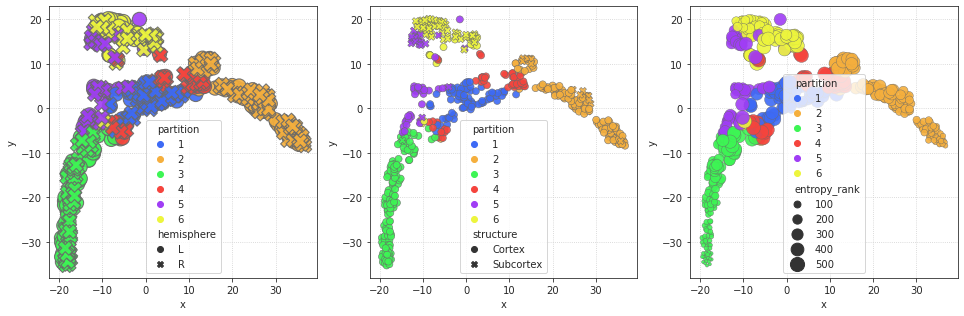

In [28]:
fig, axes = create_figure(1, 3, (13.5, 4.5), 'ticks')

_df = pd.DataFrame({
    'x': y_emb[:, 0],
    'y': y_emb[:, 1],
    'partition': 1 + np.argmax(pi_avg, axis=0),
    'structure': cortex_subcortex,
    'hemisphere': hemis,
    'entropy': eh,
    'entropy_rank': ehr,
})
sns.scatterplot(
    data=_df,
    x='x',
    y='y',
    hue='partition',
    style='hemisphere',
    markers={'L': 'o', 'R': 'X'},
    palette=svinet.colors,
    s=200,
    edgecolor='dimgrey',
    alpha=0.9,
    ax=axes[0],
)
sns.scatterplot(
    data=_df,
    x='x',
    y='y',
    hue='partition',
    style='structure',
    markers={'Cortex': 'o', 'Subcortex': 'X'},
    palette=svinet.colors,
    s=50,
    edgecolor='dimgrey',
    alpha=0.9,
    ax=axes[1],
)
sns.scatterplot(
    data=_df,
    x='x',
    y='y',
    hue='partition',
    size='entropy_rank',
    sizes=(10, 200),
    palette=svinet.colors,
    edgecolor='dimgrey',
    alpha=0.9,
    ax=axes[2],
)

for ax in axes.ravel():
    ax.grid()
plt.show()

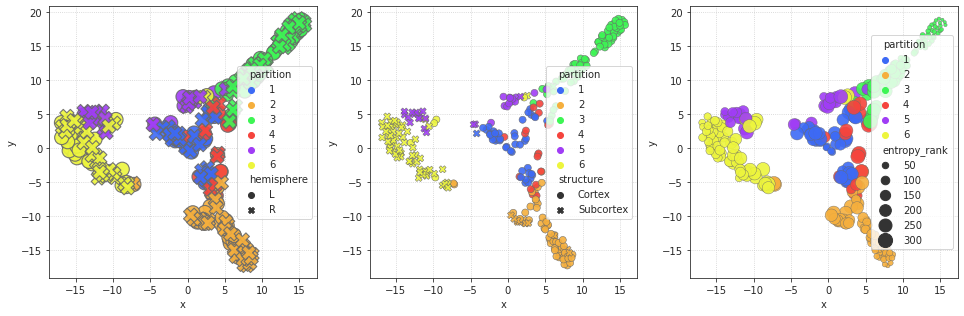

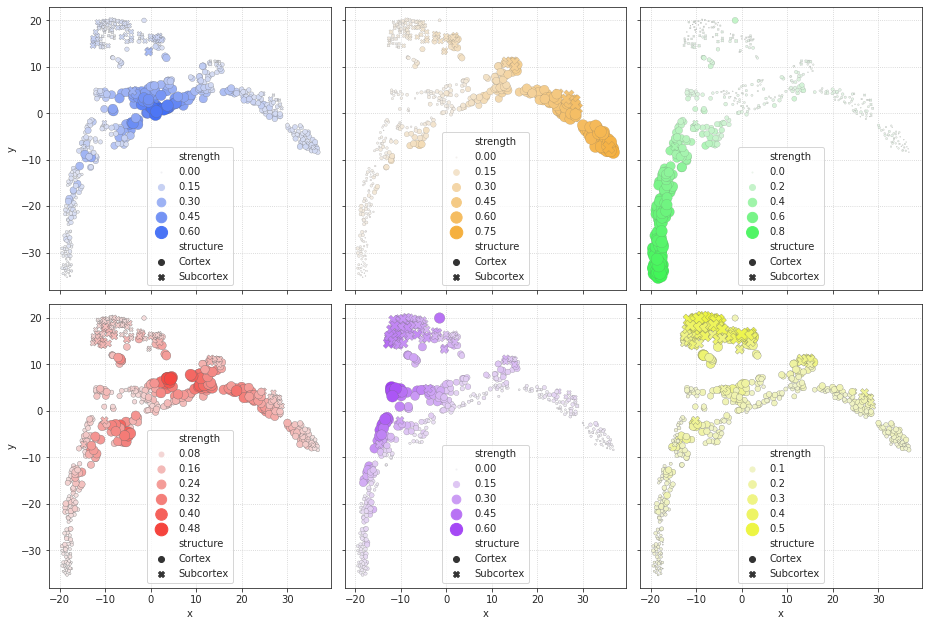

In [38]:
nrows = 2
ncols = int(np.ceil(k / nrows))
fig, axes = create_figure(nrows, ncols, (13, 4.4 * nrows), 'ticks', 'all', 'all')

for i, ax in enumerate(axes.ravel()):
    if i == k:
        break

    _df = pd.DataFrame({
        'x': y_emb[:, 0],
        'y': y_emb[:, 1],
        'hemisphere': hemis,
        'structure': cortex_subcortex,
        'strength': np.round(pi_avg[i, :], 2),
    })
    sns.scatterplot(
        data=_df,
        x='x',
        y='y',
        hue='strength',
        size='strength',
        style='structure',
        sizes=(1, 160),
        palette=svinet.cmaps[i+1],
        s=120,
        edgecolor='dimgrey',
        ax=ax,
    )
    # ax.set_xlim((ax.get_xlim()[0], 44))
    ax.legend(loc="lower center")
    ax.grid()
trim_axs(axes, k)
plt.show()

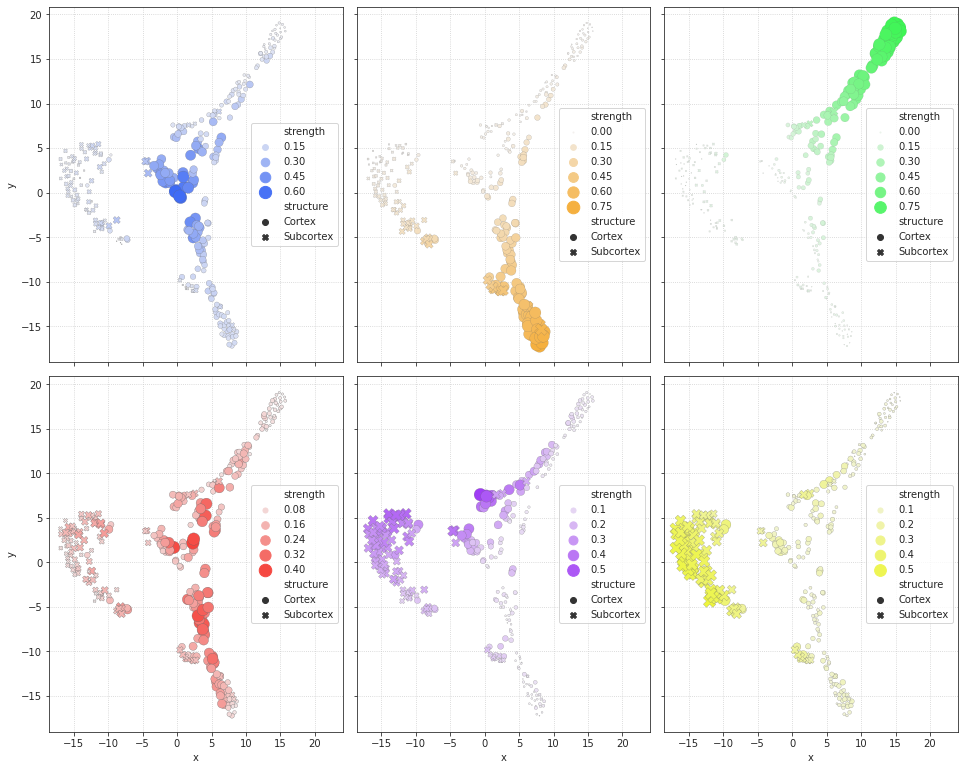